# Localized Exploratory Analysis

This exploratory analysis was done with the purpose of understanding the behavior of the meteorological variables with the Dengue variables in a specific municipality. It is worth noting that the files read in this notebook have already been preprocessed. And this notebook is designed to receive any municipality and run the analysis for the given municipality without much change to the code.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set_style("ticks")
import pandas as pd
from datetime import datetime
import glob
import os
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams.update({'font.size': 12})

In [176]:
df = pd.read_csv("local/data/villavicencio_consolidado_2007_2020.csv", index_col = 0, parse_dates= True)

In [177]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE'],
      dtype='object')

In [222]:
municipality = "Villavicencio"

In [223]:
def plot_time_series(dates_array, values_array,  labels, colors, title, x_label, y_label, kind = "lineplot", fulldates = False):
    """
    Function to plot time series: 
    
    dates: must be an array of datetime series for the x axis
    values: the array of y axis values to plot
    labels: the array of labels for each plot
    title: string that goes above the plot
    x_label: string that goes on the x-axis
    y_label: string that goes on the y-axis
    kind: the type of the graph
    fulldates: if the plot is going to receive full dates or just numbers.
    """
    years_locator = mdates.YearLocator()
    months_locator = mdates.MonthLocator()
    years_format = mdates.DateFormatter('%Y')
    sns.set_style('ticks')
    fig, ax = plt.subplots(1,1, figsize=(12,5), dpi = 150)

    ax.ticklabel_format(axis='y', style='plain')
    if fulldates:
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_major_locator(years_locator)
        ax.xaxis.set_major_formatter(years_format)
        ax.xaxis.set_minor_locator(months_locator)
    
    for i in range(len(dates_array)):
        if kind == "lineplot":
            sns.lineplot(x=dates_array[i], y=values_array[i],  label = labels_array[i], color = colors[i], ax = ax)

    rotation = 45
    plt.setp(ax.get_xticklabels(), rotation=rotation)
    plt.xlabel(x_label, fontsize='16')
    plt.ylabel(y_label, fontsize='16')
    plt.title(title, fontsize='18')

    plt.show()

# TEMPERATURE PLOTS

The temperature variable must always looked at in 3 different forms, the maximum, minimum and mean temperature. 

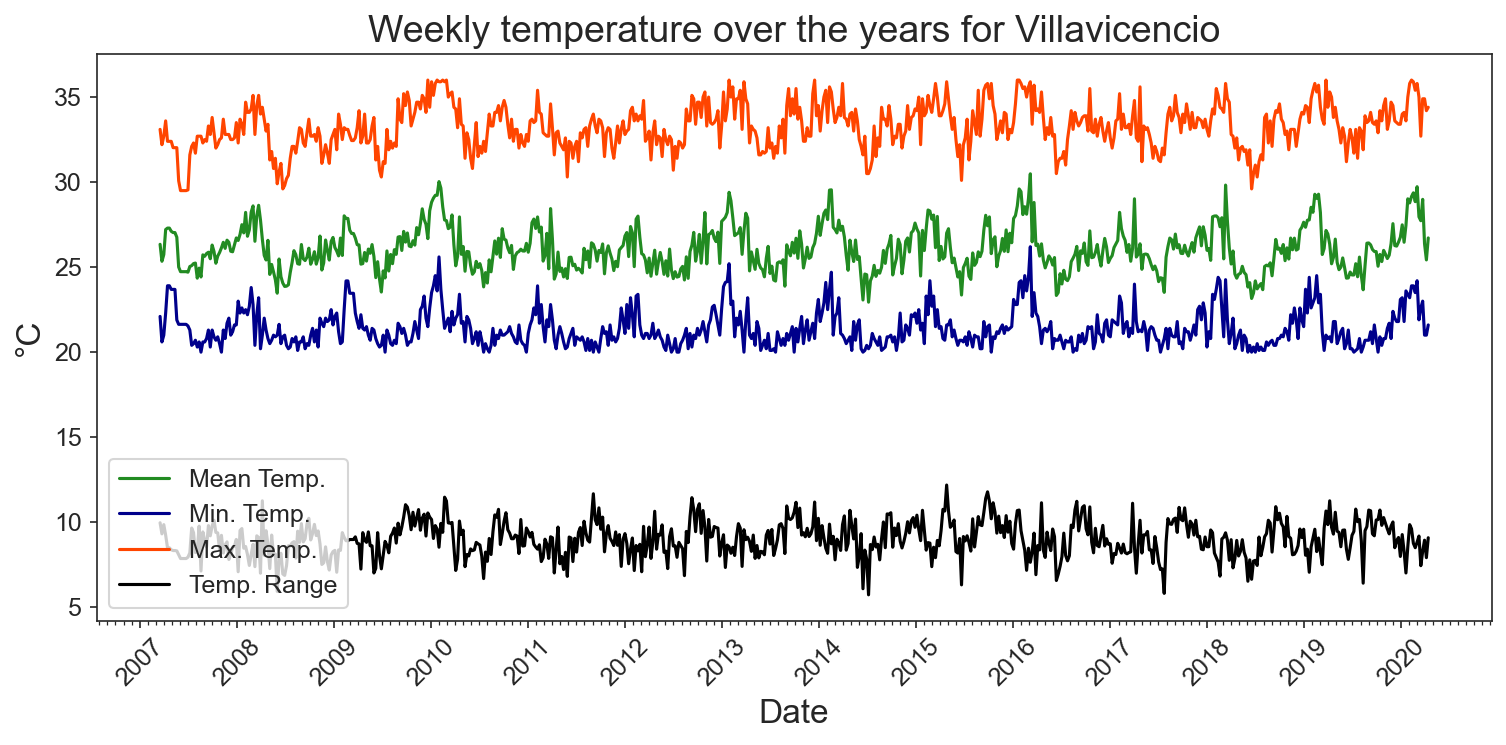

In [224]:
x_array = [df.index]*4
y_array = [df["TEMPERATURE_MEAN"], df["TEMPERATURE_AMIN"],df["TEMPERATURE_AMAX"] , df["TEMPERATURE_RANGE"]]
labels_array = ["Mean Temp.", "Min. Temp.", "Max. Temp." , "Temp. Range"]
colors = ["forestgreen","darkblue","orangered","black"]
title = "Weekly temperature over the years for " + municipality
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)

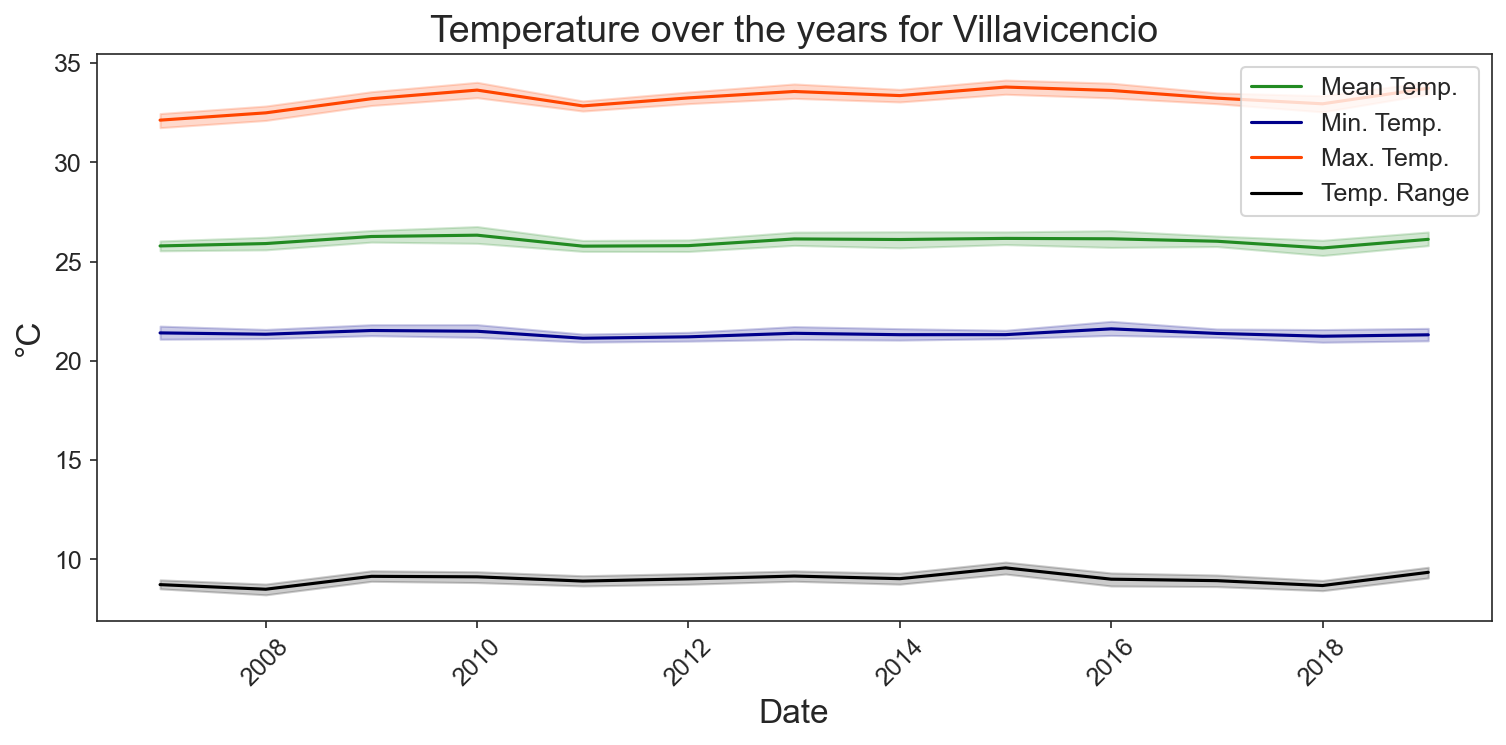

In [225]:
df_filt = df[(df["ANO"]>=2007) & (df["ANO"]<=2019)]
x_array = [df_filt["ANO"]]*4
y_array = [df_filt["TEMPERATURE_MEAN"], df_filt["TEMPERATURE_AMIN"],df_filt["TEMPERATURE_AMAX"] , df_filt["TEMPERATURE_RANGE"]]
labels_array = ["Mean Temp.", "Min. Temp.", "Max. Temp." , "Temp. Range"]
colors = ["forestgreen","darkblue","orangered","black"]
title = "Temperature over the years for " + municipality
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot")

Text(0.5, 0, 'Month')

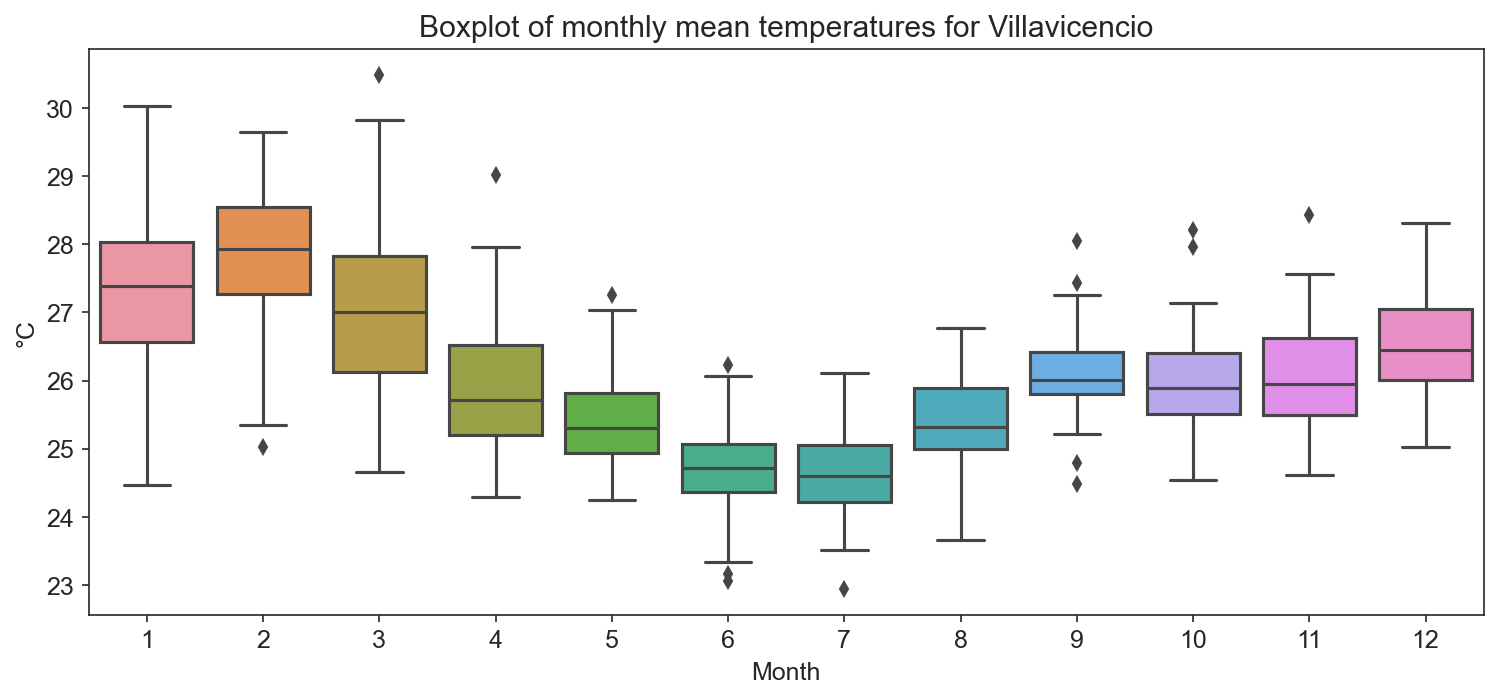

In [226]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["TEMPERATURE_MEAN"])
axes.set_title("Boxplot of monthly mean temperatures for " + municipality)
axes.set_ylabel("°C")
axes.set_xlabel("Month")

# HUMIDITY PLOTS

The humidity variable must always looked at in 3 different forms, the maximum, minimum and mean humidity. 

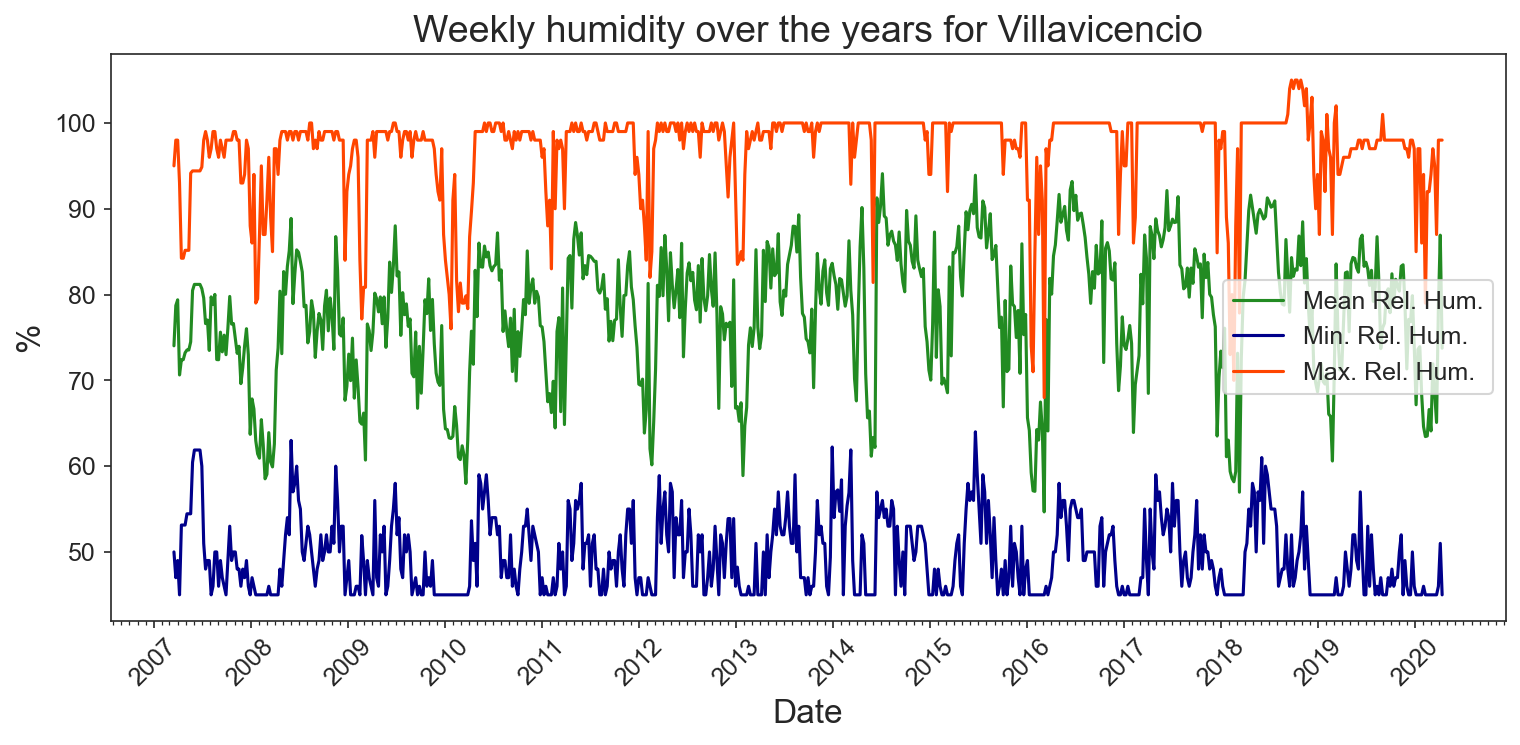

In [227]:
x_array = [df.index]*3
y_array = [df["REL_HUMIDITY_MEAN"], df["REL_HUMIDITY_AMIN"],df["REL_HUMIDITY_AMAX"] ]
labels_array = ["Mean Rel. Hum.", "Min. Rel. Hum.", "Max. Rel. Hum."]
title = "Weekly humidity over the years for " + municipality
colors = ["forestgreen","darkblue","orangered"]
ylabel = "%"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array, colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

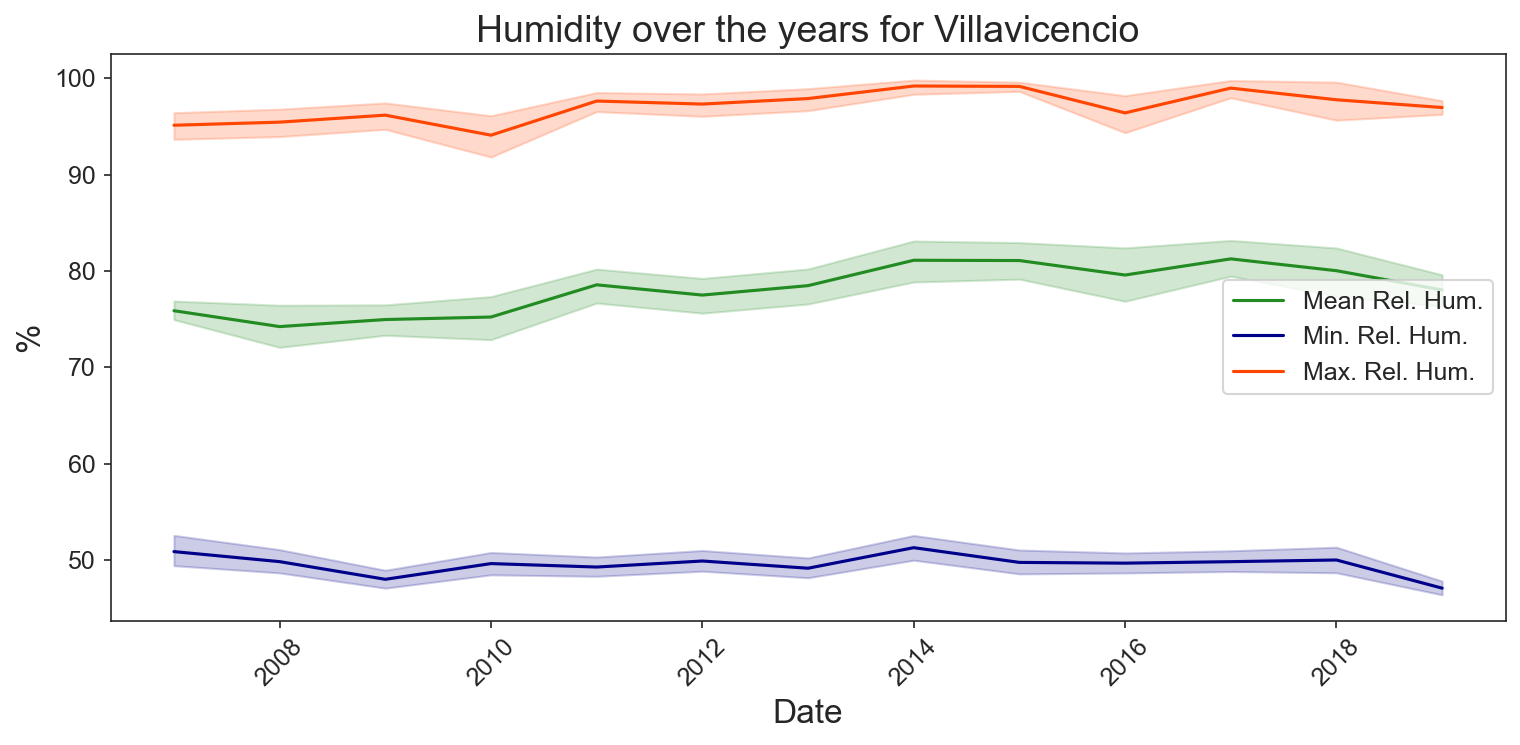

In [228]:
x_array = [df_filt["ANO"]]*3
y_array = [df_filt["REL_HUMIDITY_MEAN"], df_filt["REL_HUMIDITY_AMIN"],df_filt["REL_HUMIDITY_AMAX"] ]
labels_array = ["Mean Rel. Hum.", "Min. Rel. Hum.", "Max. Rel. Hum."]
title = "Humidity over the years for " + municipality
ylabel = "%"
xlabel = "Date"
colors = ["forestgreen","darkblue","orangered"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = False)

Text(0.5, 0, 'Month')

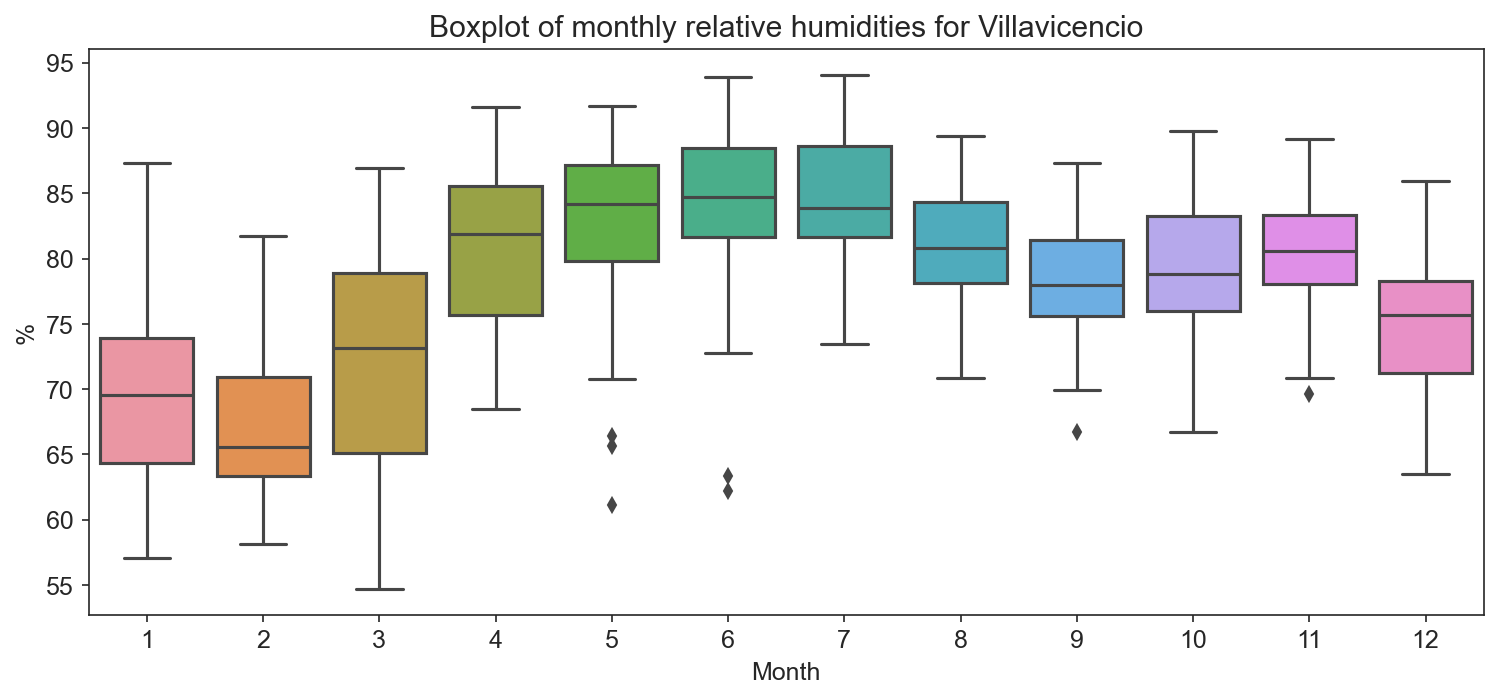

In [229]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["REL_HUMIDITY_MEAN"])
axes.set_title("Boxplot of monthly relative humidities for " + municipality)
axes.set_ylabel("%")
axes.set_xlabel("Month")

# PRECIPITATION PLOTS

The precipitation variable, due to its nature, must be analyzed as the total precipitation. The maximum and minimums in this variable do not describe the general behavior of the variable.

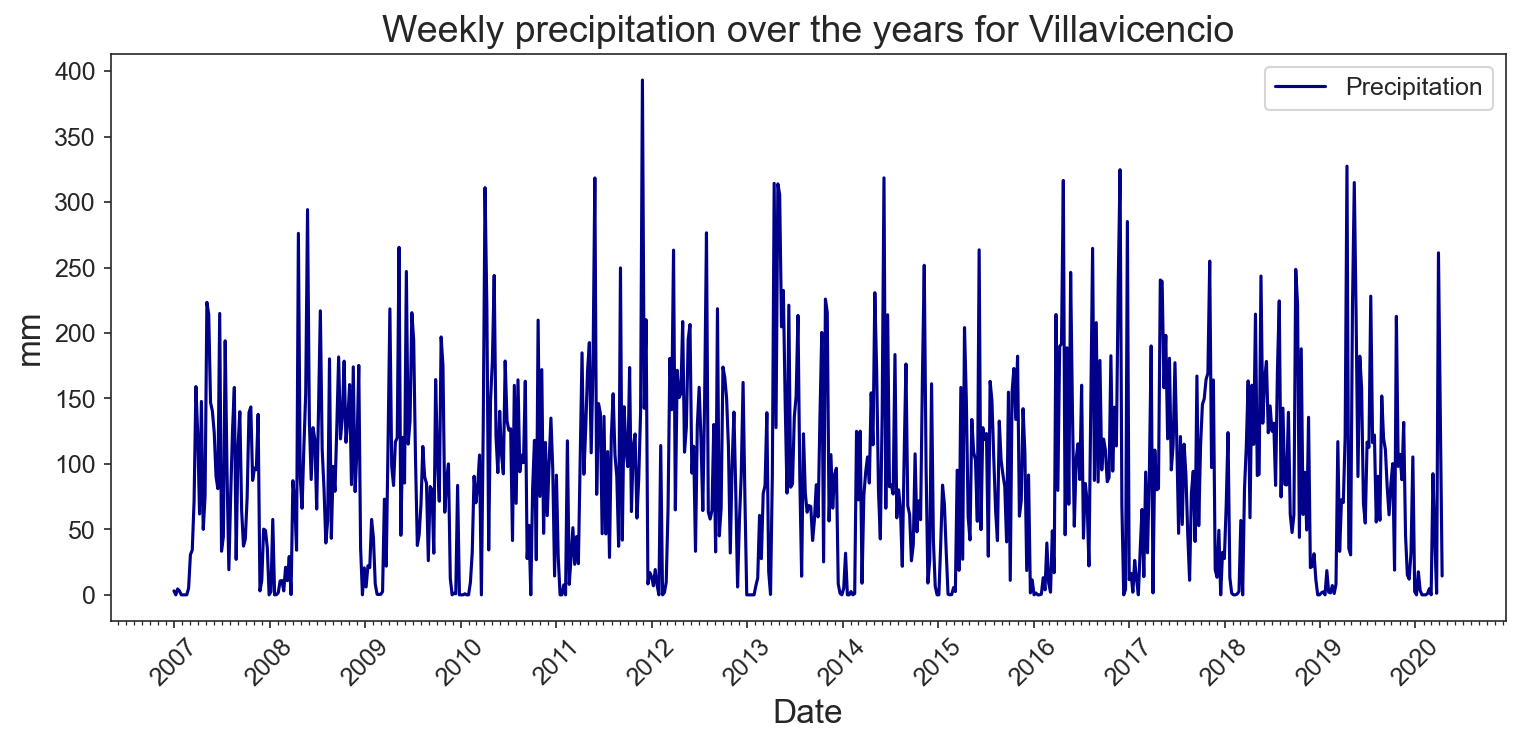

In [230]:
x_array = [df.index]
y_array = [df["PRECIPITATION"]]
labels_array = ["Precipitation"]
title = "Weekly precipitation over the years for " + municipality
ylabel = "mm"
xlabel = "Date"
colors = ["darkblue"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)

Text(0.5, 0, 'Month')

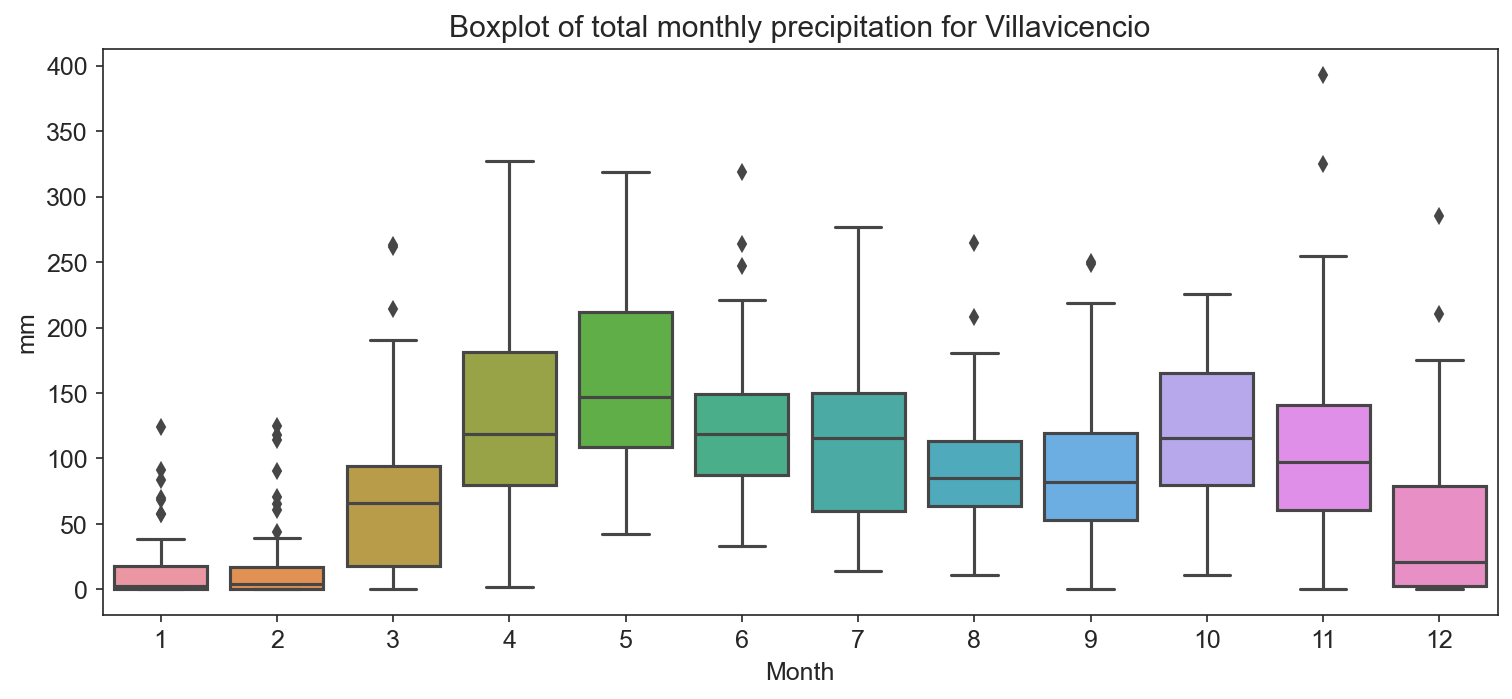

In [231]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["PRECIPITATION"])
axes.set_title("Boxplot of total monthly precipitation for " + municipality)
axes.set_ylabel("mm")
axes.set_xlabel("Month")

In [232]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE', 'MES'],
      dtype='object')

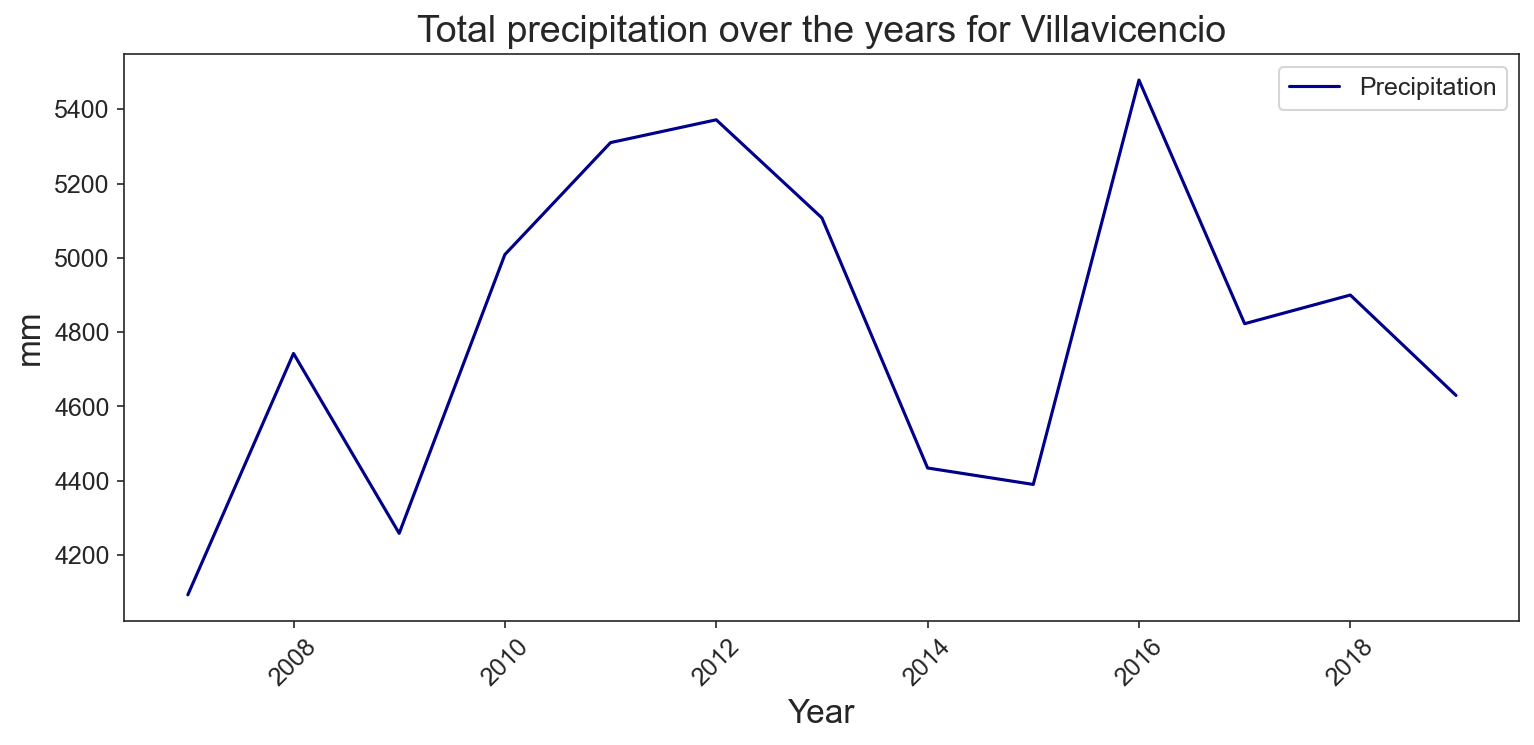

In [233]:
df_prec_yearly = df[(df.index.year >= 2007) & (df.index.year <= 2019)]
df_prec_yearly = df_prec_yearly[["PRECIPITATION","DRY_DAYS"]]
df_prec_yearly = df_prec_yearly.groupby(df_prec_yearly.index.year).sum()
x_array = [df_prec_yearly.index]
y_array = [df_prec_yearly["PRECIPITATION"]]
labels_array = ["Precipitation"]
title = "Total precipitation over the years for " + municipality
ylabel = "mm"
xlabel = "Year"
colors = ["darkblue"]
plot_time_series(x_array, y_array, labels_array, colors, title, xlabel,ylabel, "lineplot", fulldates = False)

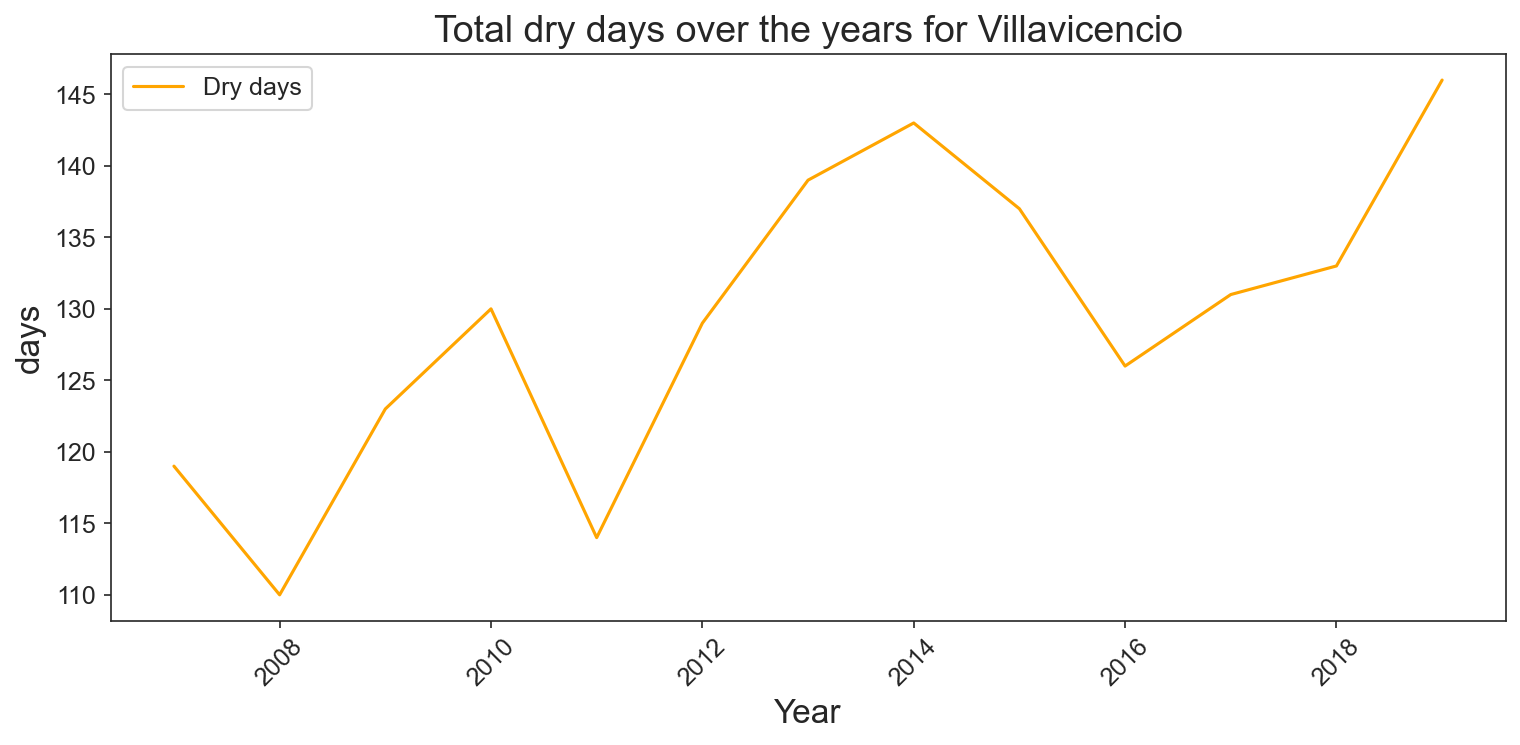

In [234]:
x_array = [df_prec_yearly.index]
y_array = [df_prec_yearly["DRY_DAYS"]]
labels_array = ["Dry days"]
title = "Total dry days over the years for " + municipality
ylabel = "days"
xlabel = "Year"
colors = ["orange"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = False)

# NIÑO PLOTS

The Niño indexes are also very important features to analyze in this project. That is why it is interesting to analyze and understand their behavior in time series plots.

In [235]:
df.columns

Index(['COD_DPTO', 'COD_MUNICIPIO', 'POBLACION', 'ANO', 'SEMANA',
       'PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE', 'DENGUE GRAVE',
       'MORTALIDAD POR DENGUE', 'MES'],
      dtype='object')

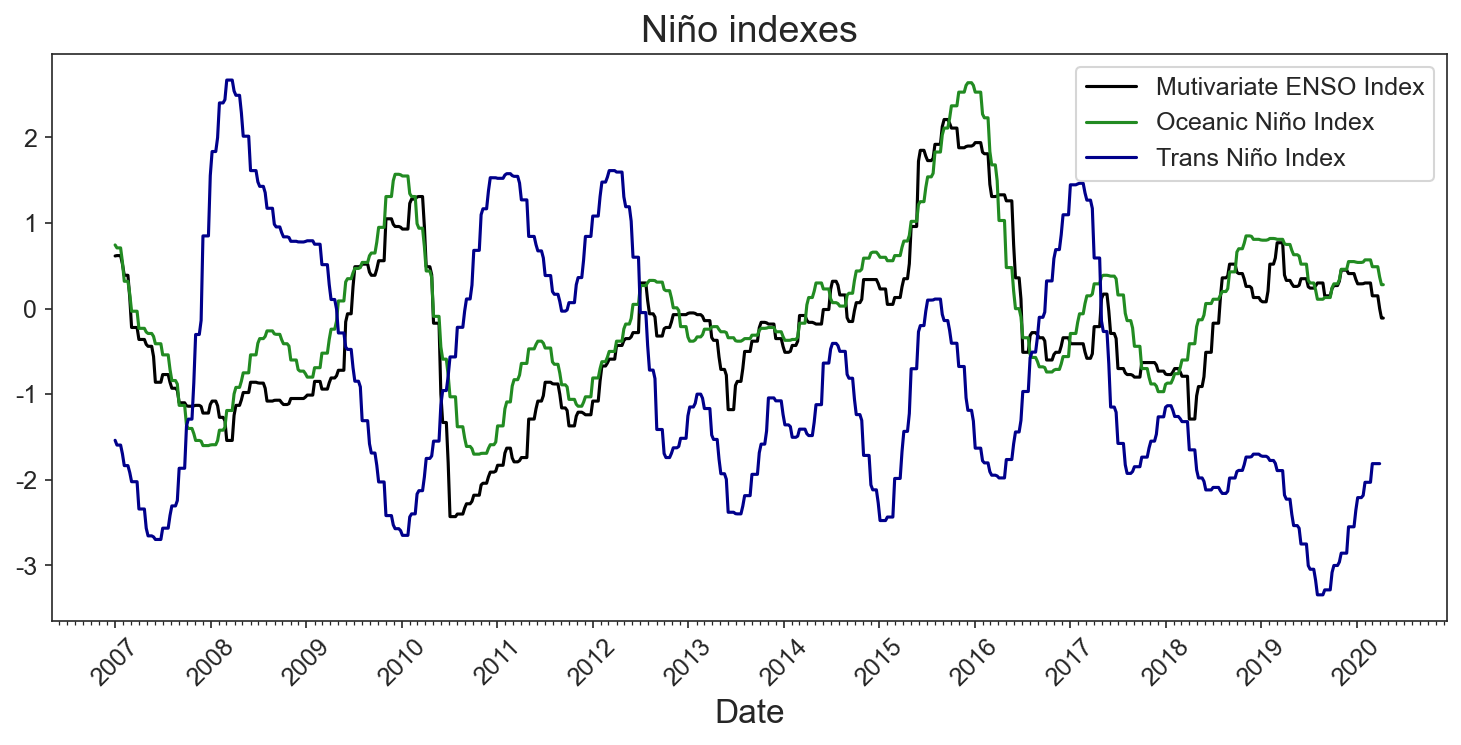

In [236]:
x_array = [df.index]*3
y_array = [df["MEI"], df["ONI"], df["TNI"]]
labels_array = ["Mutivariate ENSO Index", "Oceanic Niño Index", "Trans Niño Index"]
colors = ["black","forestgreen","darkblue","orangered","cyan","black"]
title = "Niño indexes"
ylabel = ""
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

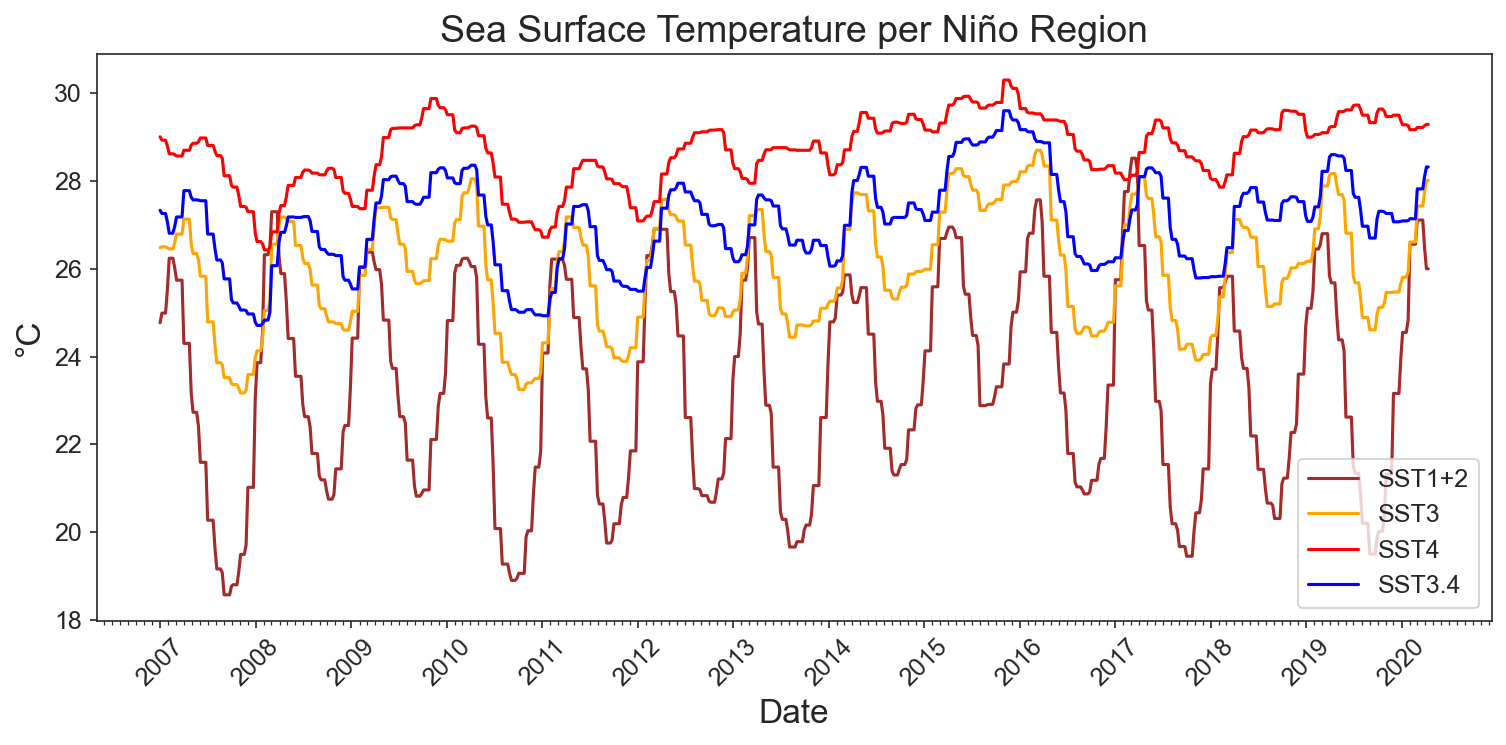

In [237]:
x_array = [df.index]*4
y_array = [df["SST1+2"], df["SST3"], df["SST4"], df["SST3.4"]]
labels_array = ["SST1+2", "SST3", "SST4", "SST3.4"]
colors = ["brown","orange","red","blue"]
title = "Sea Surface Temperature per Niño Region"
ylabel = "°C"
xlabel = "Date"
plot_time_series(x_array, y_array, labels_array,colors,title,  xlabel,ylabel, "lineplot", fulldates = True)

# DENGUE PLOTS

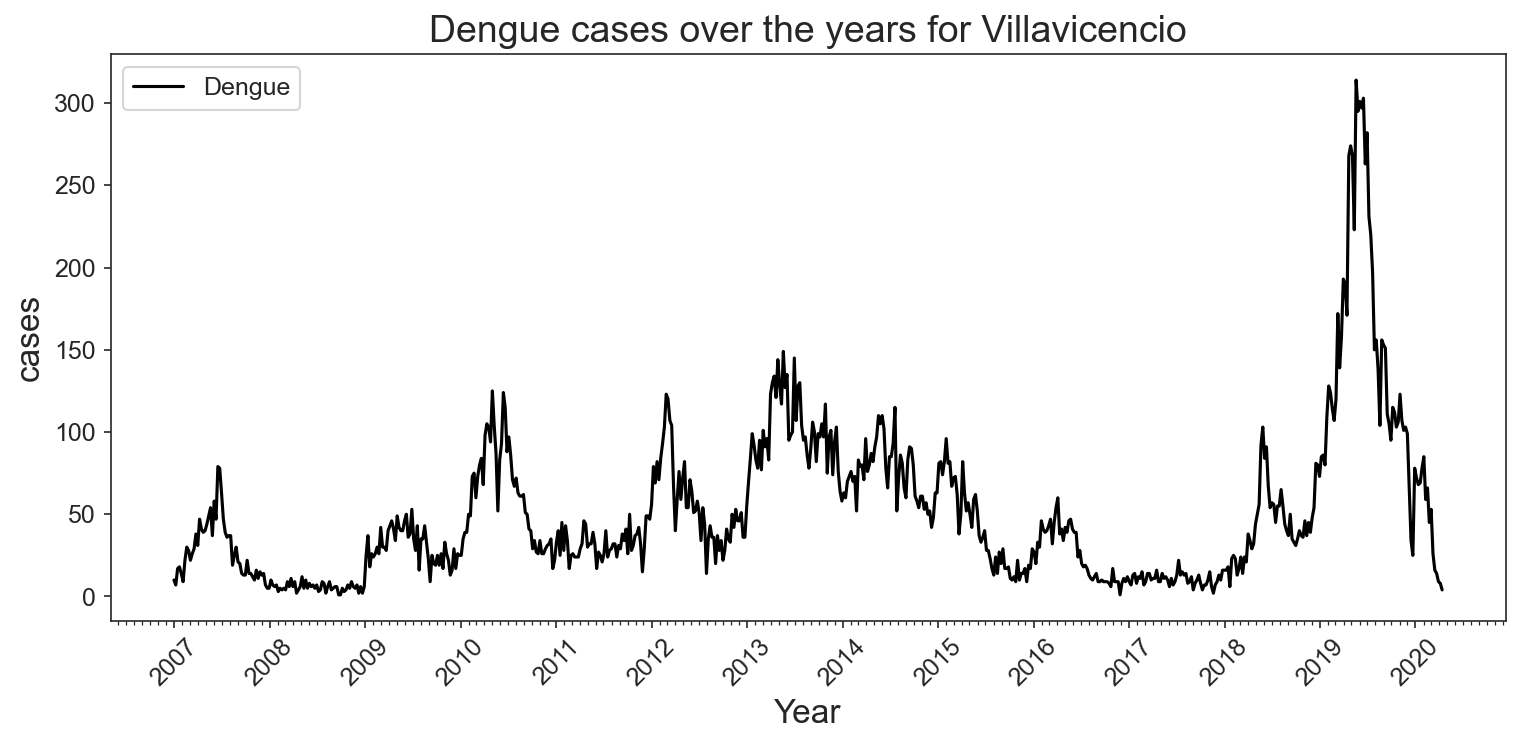

In [238]:
x_array = [df.index]
y_array = [df["DENGUE"]]
labels_array = ["Dengue"]
title = "Dengue cases over the years for " + municipality
ylabel = "cases"
xlabel = "Year"
colors = ["black"]
plot_time_series(x_array, y_array, labels_array, colors, title,  xlabel,ylabel, "lineplot", fulldates = True)


Text(0.5, 0, 'Month')

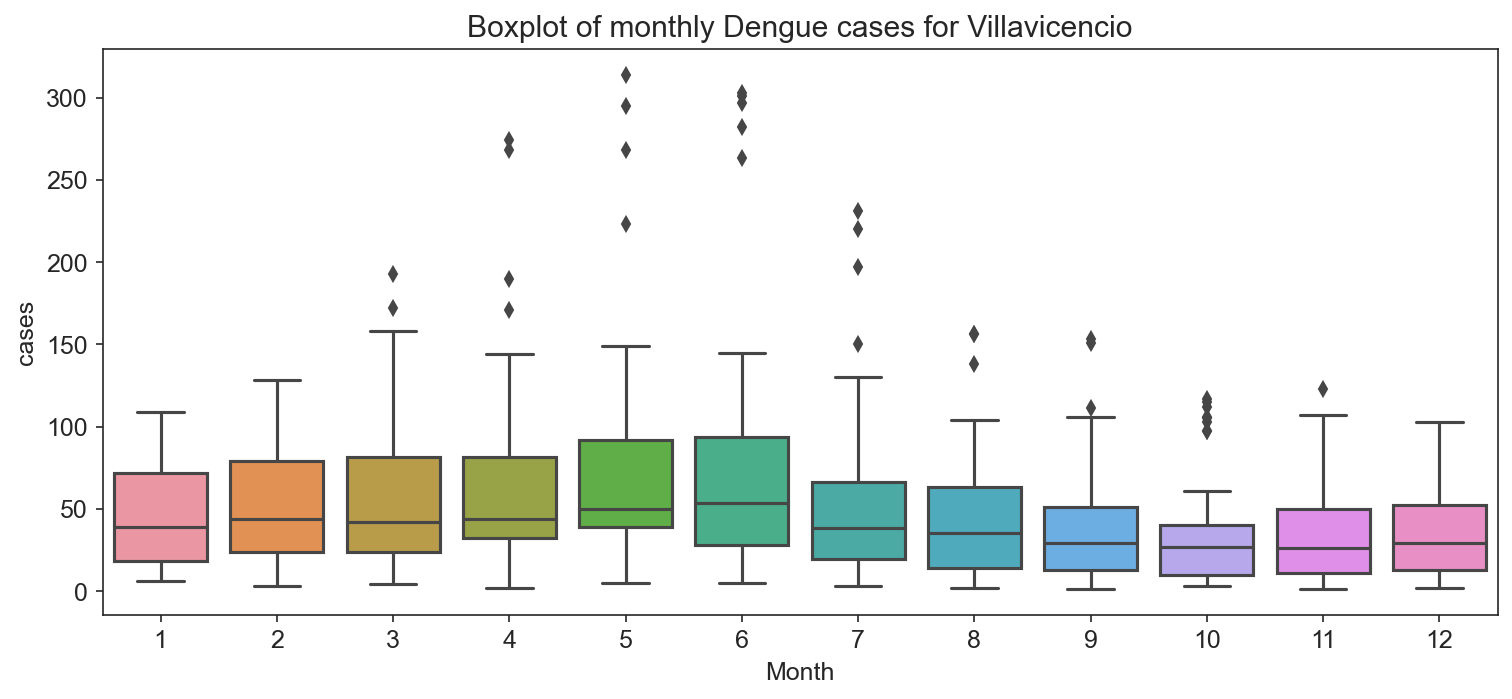

In [239]:
fig, axes = plt.subplots(1,1, figsize=(12,5), dpi = 150)
sns.boxplot(x=df.index.month, y=df["DENGUE"])
axes.set_title("Boxplot of monthly Dengue cases for " + municipality)
axes.set_ylabel("cases")
axes.set_xlabel("Month")

## BOXPLOTS FOR UNDERSTANDING THE BEHAVOIR OF EACH VARIABLE THROUGH TIME

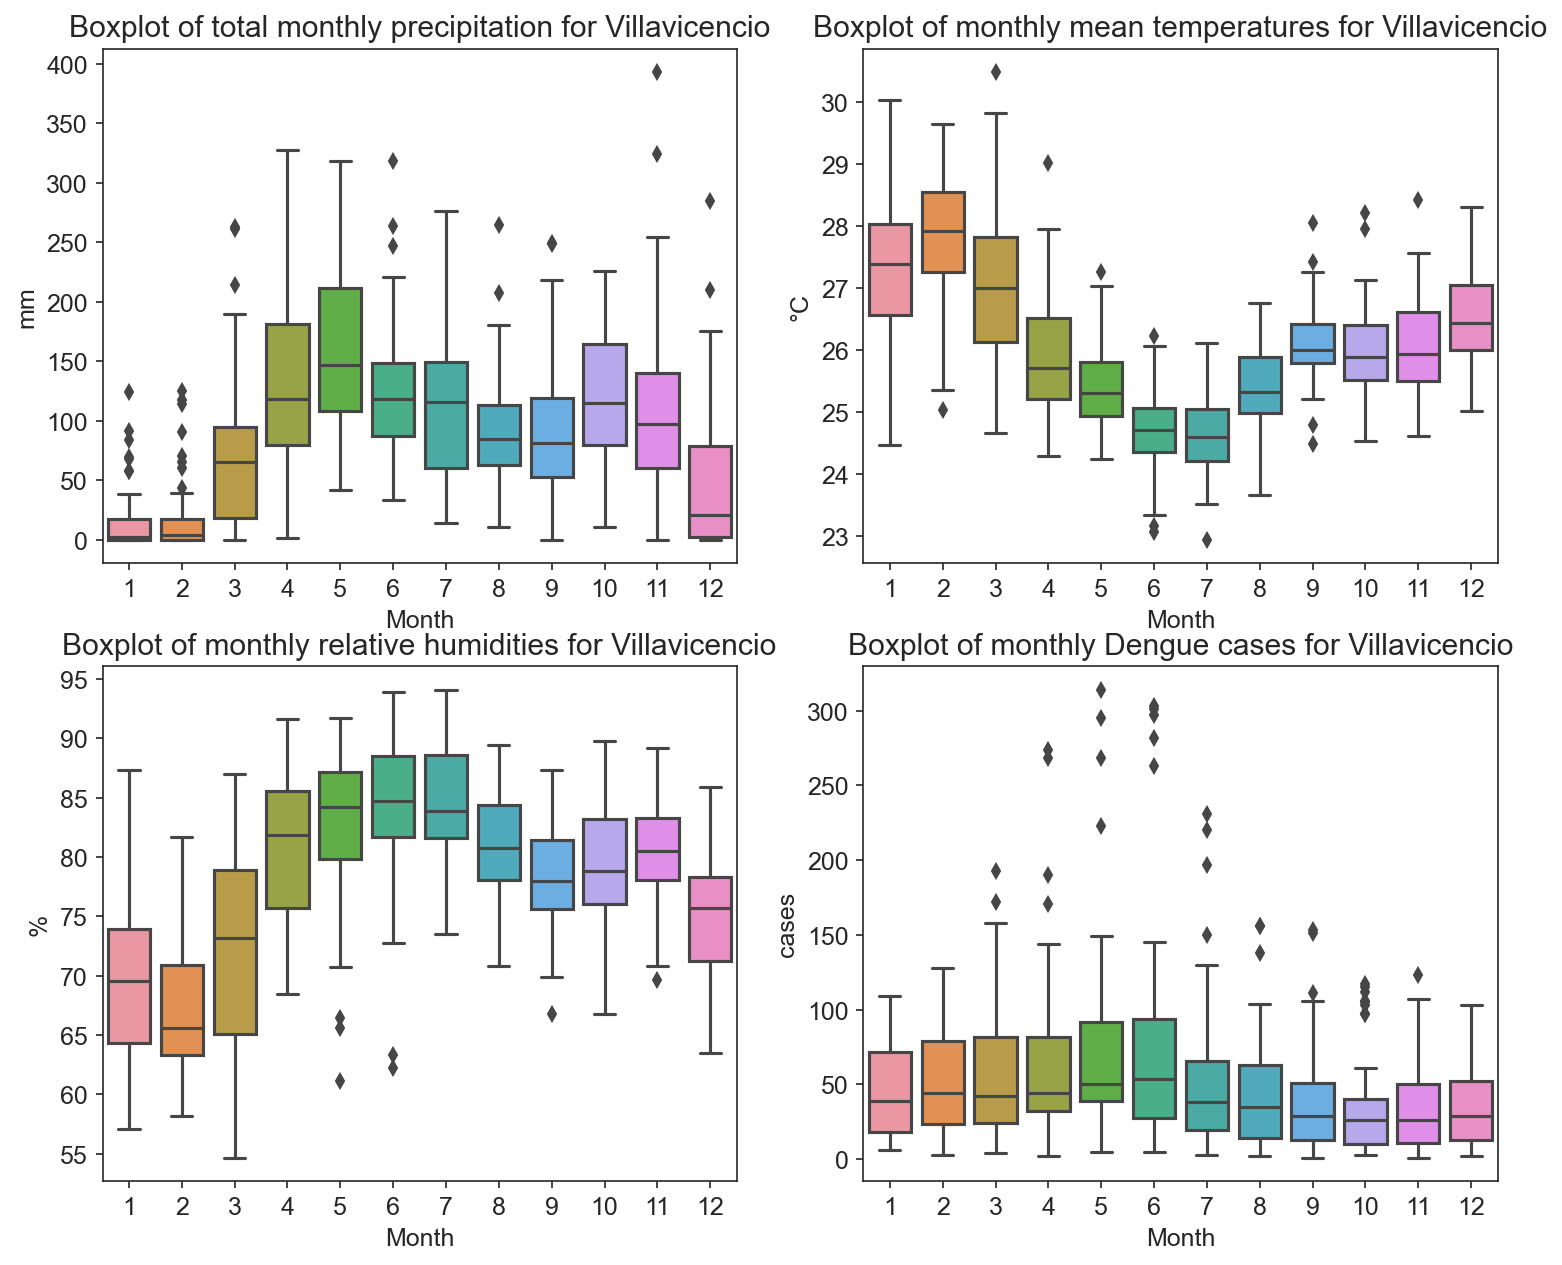

In [240]:
cols = ['PRECIPITATION', 'TEMPERATURE_MEAN', 'REL_HUMIDITY_MEAN', 'DENGUE']
titles = ["Boxplot of total monthly precipitation for ", 
          "Boxplot of monthly mean temperatures for ",
          "Boxplot of monthly relative humidities for ",
          "Boxplot of monthly Dengue cases for "]
ylables = ['mm', '°C', '%', 'cases']

fig, ax = plt.subplots(figsize=(12, 10), dpi = 150)

for i, col in enumerate(cols):
    plt.subplot(2,2, i+1)
    sns.boxplot(x=df.index.month, y=df[col]).set_title(titles[i] + municipality)
    plt.ylabel(ylables[i])
    plt.xlabel("Month")

# SIMPLE CORRELATION BETWEEN ALL VARIABLES

Some of the variables do not have to be in the correlation matrix. That's why they are removed from the beginning.

In [241]:
df_for_corr = df.drop(columns=['COD_DPTO',"COD_MUNICIPIO","POBLACION", "DENGUE GRAVE","MORTALIDAD POR DENGUE"])

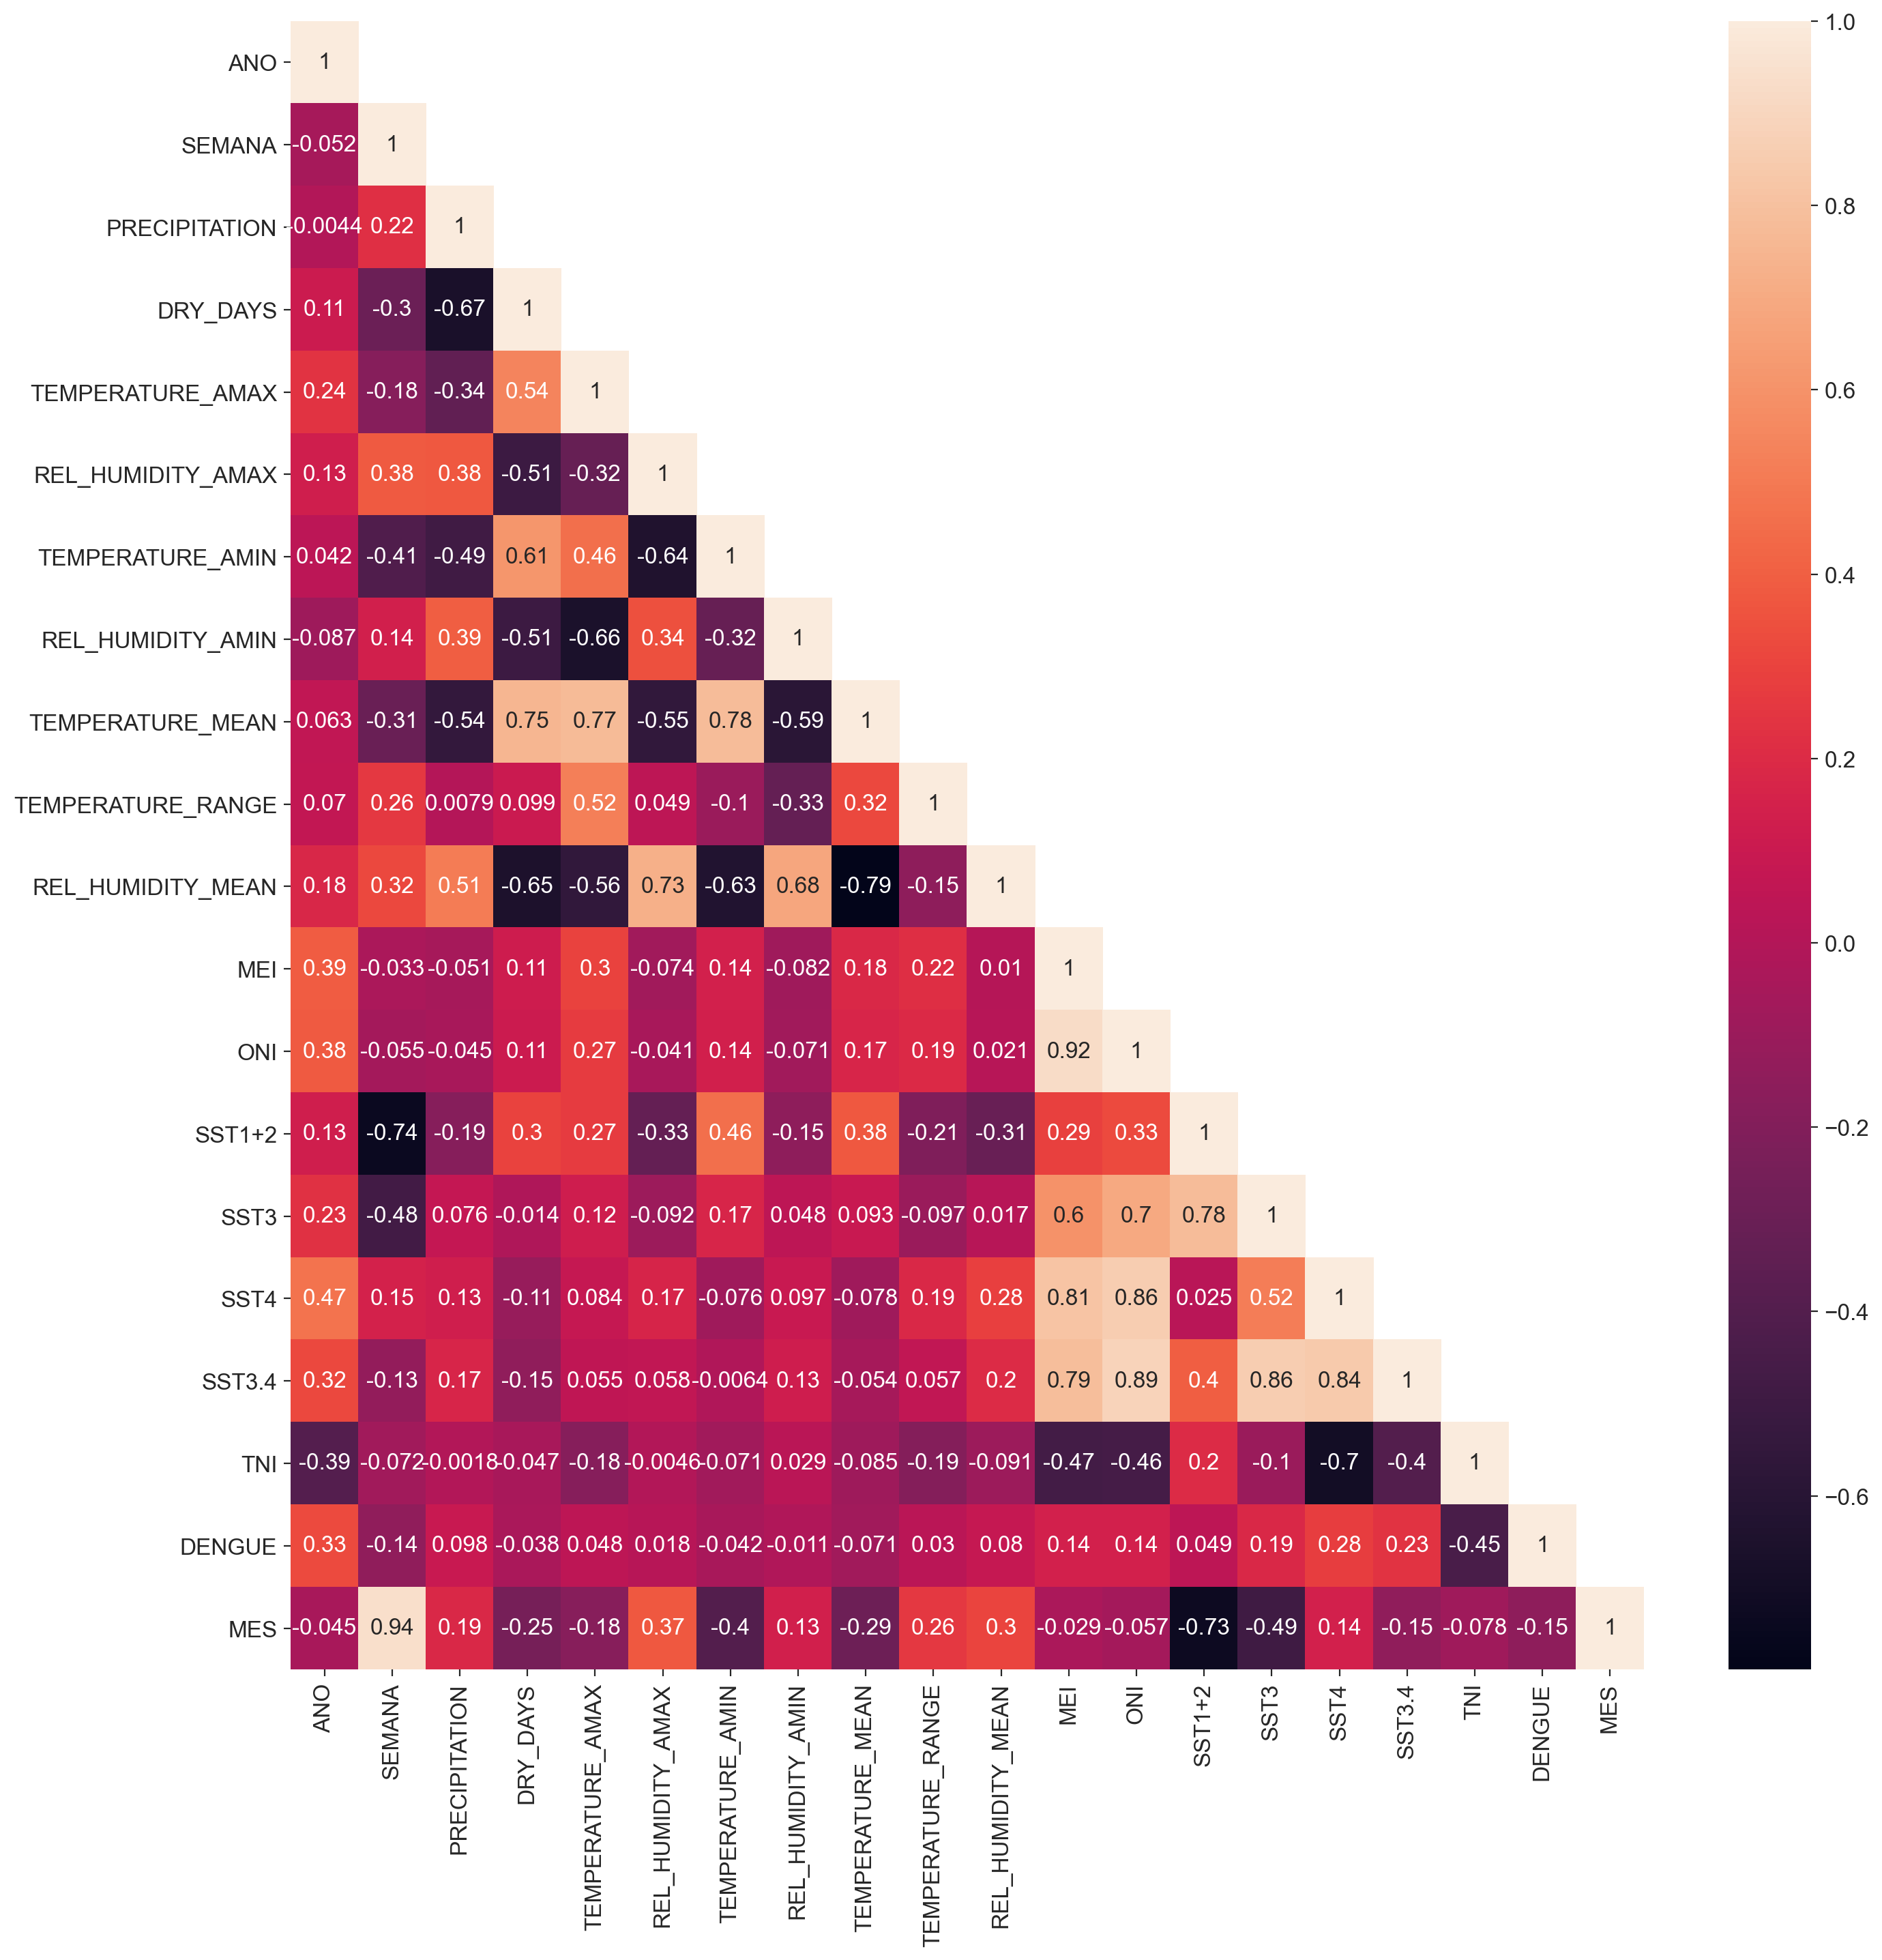

In [242]:
fig, axs = plt.subplots(1,figsize=(16,16), dpi = 200)
corrMatrix = df_for_corr.corr()
corrMatrix = corrMatrix.where(np.tril(np.ones(corrMatrix.shape)).astype(np.bool))
sns.heatmap(corrMatrix, annot=True)
plt.show()

We see that some variables are quite correlated, so we could remove some of these. Interestingly, despite being the closest to Cali the SST for Region 1+2 has the weakest correlation with Dengue cases.

From the correlation matrix we see that variables such as: mean temperature, MEI, ONI, SST4, SST3.4 and TNI are the most correlated with the number of Dengue cases.

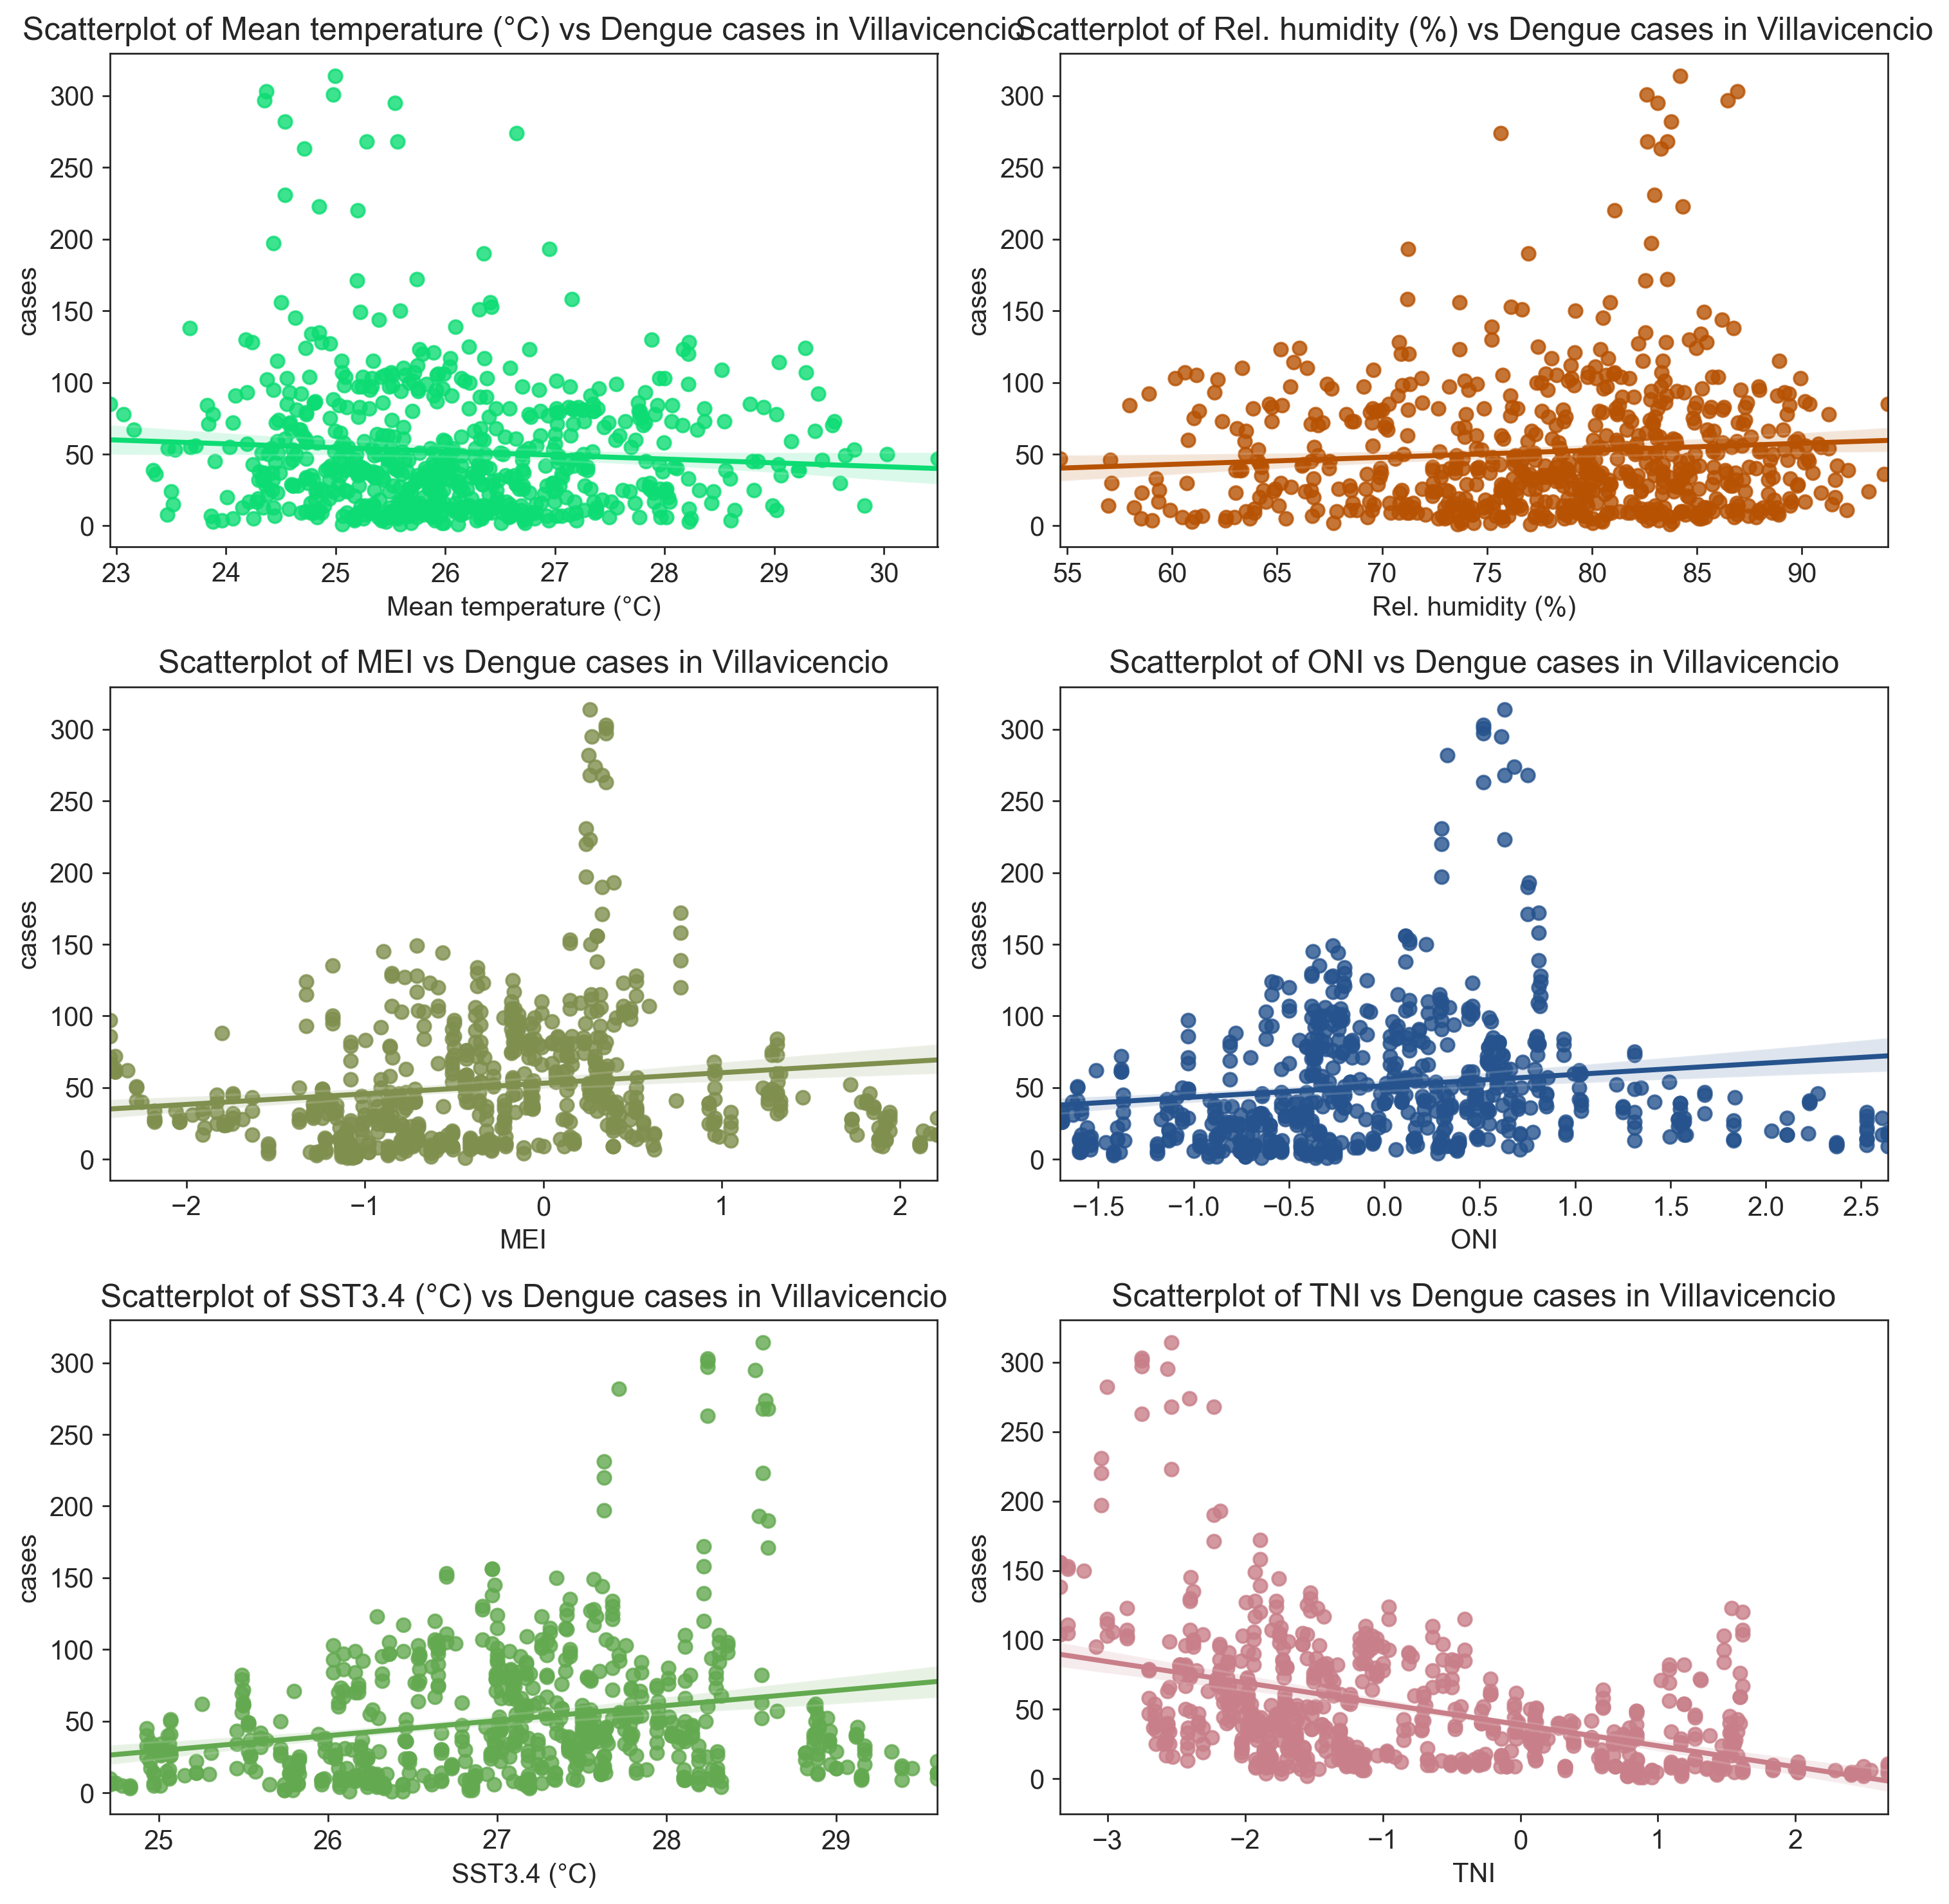

In [243]:
fig, axes = plt.subplots(3,2, figsize=(12,12), dpi = 250)
axes = axes.flatten()
vars_to_plot = ["TEMPERATURE_MEAN","REL_HUMIDITY_MEAN","MEI","ONI","SST3.4","TNI"]
xlabels  = ["Mean temperature (°C)","Rel. humidity (%)", "MEI", "ONI", "SST3.4 (°C)", "TNI"]
colors = list(mcolors.get_named_colors_mapping().keys())[99:105]
for i,var in enumerate(vars_to_plot):
    sns.regplot(x = df[var], y = df["DENGUE"], ax = axes[i], color = colors[i])
    axes[i].set_title("Scatterplot of "+xlabels[i]+" vs Dengue cases in " + municipality)
    axes[i].set_ylabel("cases")
    axes[i].set_xlabel(xlabels[i])
plt.tight_layout()

# CORRELATION OVER THE YEARS WITH DELAYS BETWEEN THE COVARIATES AND THE DENGUE CASES

In [244]:
df["MES"] = df.index.month


In order to calculate the correlation of dengue with the lagged covariates a function was created. This function guarantees that a correlation is calculated for each meteorological variable for a specific number of lags against dengue (`lag_size`).  

This function lags the meteorological covariate, but does not lag the dengue variable, and according to this data it calculates the respective correlation over time.

In [245]:
df

COD_DPTO  COD_MUNICIPIO  POBLACION   ANO  SEMANA  PRECIPITATION  \
FECHA                                                                         
2006-12-31        50          50001   400537.0  2007       1            3.0   
2007-01-07        50          50001   400537.0  2007       2            0.0   
2007-01-14        50          50001   400537.0  2007       3            4.5   
2007-01-21        50          50001   400537.0  2007       4            3.0   
2007-01-28        50          50001   400537.0  2007       5            0.0   
...              ...            ...        ...   ...     ...            ...   
2020-03-15        50          50001   538523.0  2020      12           42.1   
2020-03-22        50          50001   538523.0  2020      13            1.2   
2020-03-29        50          50001   538523.0  2020      14          261.2   
2020-04-05        50          50001   538523.0  2020      15          140.9   
2020-04-12        50          50001   538523.0  2020      16           14.4   

            DRY_DAYS  TEMPERATURE_AMAX  REL_HUMIDITY_AMAX  TEMPERATURE_AMIN  \
FECHA                                                                         
2006-12-31         6               NaN                NaN               NaN   
2007-01-07         7               NaN                NaN               NaN   
2007-01-14         5               NaN                NaN               NaN   
2007-01-21         6               NaN                NaN               NaN   
2007-01-28         7               NaN                NaN               NaN   
...              ...               ...                ...               ...   
2020-03-15         6              32.7               95.0              22.6   
2020-03-22         5              34.9               87.0              23.0   
2020-03-29         3              34.9               98.0              21.0   
2020-04-05         1              34.2               98.0              21.0   
2020-04-12         4              34.4               98.0              21.6   

            ...       ONI     SST1+2       SST3       SST4     SST3.4  \
FECHA       ...                                                         
2006-12-31  ...  0.744286  24.770000  26.480000  29.007143  27.331429   
2007-01-07  ...  0.710000  24.990000  26.500000  28.930000  27.260000   
2007-01-14  ...  0.710000  24.990000  26.500000  28.930000  27.260000   
2007-01-21  ...  0.710000  24.990000  26.500000  28.930000  27.260000   
2007-01-28  ...  0.542857  25.525714  26.478571  28.797143  27.067143   
...         ...       ...        ...        ...        ...        ...   
2020-03-15  ...  0.490000  27.110000  27.430000  29.220000  27.820000   
2020-03-22  ...  0.490000  27.110000  27.430000  29.220000  27.820000   
2020-03-29  ...  0.370000  26.475714  27.761429  29.260000  28.105714   
2020-04-05  ...  0.280000  26.000000  28.010000  29.290000  28.320000   
2020-04-12  ...  0.280000  26.000000  28.010000  29.290000  28.320000   

                 TNI  DENGUE  DENGUE GRAVE  MORTALIDAD POR DENGUE  MES  
FECHA                                                                   
2006-12-31 -1.538286      10             0                      0   12  
2007-01-07 -1.594000       7             0                      0    1  
2007-01-14 -1.594000      17             4                      0    1  
2007-01-21 -1.594000      18             1                      0    1  
2007-01-28 -1.696857      14             2                      0    1  
...              ...     ...           ...                    ...  ...  
2020-03-15 -1.811000      16             0                      0    3  
2020-03-22 -1.811000      14             0                      0    3  
2020-03-29 -1.811000       9             1                      0    3  
2020-04-05       NaN       8             0                      0    4  
2020-04-12       NaN       4             0                      0    4  

[694 rows x 25 columns]

In [246]:
promedios_mensuales = df.groupby(df.MES).mean().reset_index()
desv_esta_mensuales = df.groupby(df.MES).std().reset_index()

#promedios_mensuales = promedios_mensuales.rename(columns={'index': 'SEMANA'})
#desv_esta_mensuales = desv_esta_mensuales.rename(columns={'index': 'SEMANA'})

promedios_mensuales = promedios_mensuales[df.columns]
desv_esta_mensuales = desv_esta_mensuales[df.columns]

In [247]:
df_norm = df.copy()

prom = promedios_mensuales.values[:,0:]
std = desv_esta_mensuales.values[:,0:]
for i in range(len(df)):
    mes = int(df_norm.iloc[i,:].MES - 1)
    for j,col in  enumerate(df_norm.columns[:-4]):
        df_norm.iloc[i,j] = (df_norm.iloc[i,j]-prom[mes,j])/std[mes,j]
#df_norm = df.copy()

C:\ProgramData\Miniconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


In [248]:
def lagged_corr(df, weeks, var, window):
    return df[str(var)].shift(periods=weeks).iloc[weeks:].corr(df['DENGUE'].iloc[weeks:], min_periods=window)

                                                        
cols = ['PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX', 'REL_HUMIDITY_AMAX',
       'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN', 'TEMPERATURE_MEAN',
       'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN', 'MEI', 'ONI', 'SST1+2',
       'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE']

df_corr_melt = pd.melt(df.reset_index().reset_index(), id_vars='index', value_vars=cols)

The variables are kept to 24 lags, because after this period of time, usually the behavior starts repeating itself. This filter allows us to reduce the noise in the data.

In [249]:
df_corr_melt

index       variable  value
0          0  PRECIPITATION    3.0
1          1  PRECIPITATION    0.0
2          2  PRECIPITATION    4.5
3          3  PRECIPITATION    3.0
4          4  PRECIPITATION    0.0
...      ...            ...    ...
11793    689         DENGUE   16.0
11794    690         DENGUE   14.0
11795    691         DENGUE    9.0
11796    692         DENGUE    8.0
11797    693         DENGUE    4.0

[11798 rows x 3 columns]

In [250]:
df_corr_melt.rename(columns={'index':'lag_size'}, inplace=True)
df_corr_melt = df_corr_melt[(df_corr_melt["lag_size"]<=16)&(df_corr_melt["lag_size"]>2)]
df_corr_melt

lag_size       variable  value
3             3  PRECIPITATION    3.0
4             4  PRECIPITATION    0.0
5             5  PRECIPITATION    0.0
6             6  PRECIPITATION    0.0
7             7  PRECIPITATION    0.0
...         ...            ...    ...
11116        12         DENGUE   38.0
11117        13         DENGUE   31.0
11118        14         DENGUE   47.0
11119        15         DENGUE   41.0
11120        16         DENGUE   39.0

[238 rows x 3 columns]

In [251]:
df_corr_melt['corr'] = df_corr_melt.apply(lambda x: lagged_corr(df_norm, x.lag_size,
                                                          x.variable, 200), axis=1)

C:\ProgramData\Miniconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [252]:
df_corr_pivot = df_corr_melt.pivot_table(columns='lag_size', index='variable', values='corr')
row_max = np.abs(df_corr_pivot).idxmax(axis=1)
columns = row_max.index

In [253]:
df_corr_pivot

lag_size                 3         4         5         6         7         8   \
variable                                                                        
DENGUE             0.917056  0.899226  0.867181  0.846705  0.818648  0.791628   
DRY_DAYS           0.070496  0.082036  0.062998  0.067973  0.071261  0.071856   
MEI                0.164216  0.167900  0.172038  0.176641  0.179028  0.181970   
ONI                0.176277  0.180862  0.184582  0.189376  0.193499  0.195360   
PRECIPITATION      0.037568  0.020214  0.038348  0.039015  0.015991  0.014270   
REL_HUMIDITY_AMAX -0.017757 -0.020968 -0.013483 -0.011484 -0.005471  0.014828   
REL_HUMIDITY_AMIN -0.099517 -0.088307 -0.076708 -0.088363 -0.084911 -0.086071   
REL_HUMIDITY_MEAN  0.049622  0.043336  0.051872  0.042763  0.042742  0.038335   
SST1+2            -0.178245 -0.171208 -0.165139 -0.159566 -0.156822 -0.149090   
SST3               0.072922  0.082352  0.087730  0.092491  0.103354  0.105357   
SST3.4             0.179541  0.185169  0.188886  0.190730  0.199205  0.199053   
SST4               0.287180  0.287222  0.288158  0.287684  0.290672  0.290650   
TEMPERATURE_AMAX   0.169813  0.175573  0.164082  0.166044  0.169967  0.178638   
TEMPERATURE_AMIN  -0.059646 -0.062441 -0.063773 -0.045603 -0.028503 -0.030241   
TEMPERATURE_MEAN  -0.011601  0.002530 -0.004632  0.021999  0.031283  0.035972   
TEMPERATURE_RANGE  0.148226  0.147764  0.147428  0.152635  0.148948  0.146600   
TNI               -0.462804 -0.460450 -0.458027 -0.455887 -0.453036 -0.448203   

lag_size                 9         10        11        12        13        14  \
variable                                                                        
DENGUE             0.758851  0.730307  0.699984  0.669098  0.636758  0.603974   
DRY_DAYS           0.068913  0.087163  0.073201  0.076810  0.089113  0.100075   
MEI                0.185375  0.189558  0.191381  0.192814  0.190893  0.191127   
ONI                0.196659  0.199260  0.201785  0.203469  0.204102  0.206961   
PRECIPITATION      0.013570  0.010000  0.003977 -0.002459 -0.005350 -0.012977   
REL_HUMIDITY_AMAX  0.018427  0.016482  0.026968  0.043058  0.052722  0.046941   
REL_HUMIDITY_AMIN -0.087653 -0.094961 -0.074914 -0.074970 -0.073082 -0.075104   
REL_HUMIDITY_MEAN  0.026155  0.017795  0.030942  0.034443  0.024796  0.017720   
SST1+2            -0.135117 -0.121611 -0.114519 -0.107931 -0.096048 -0.082818   
SST3               0.109446  0.113502  0.117324  0.119844  0.126866  0.128826   
SST3.4             0.200181  0.199839  0.203216  0.205550  0.208604  0.210600   
SST4               0.290867  0.290065  0.292820  0.295242  0.297066  0.300051   
TEMPERATURE_AMAX   0.188589  0.199755  0.192104  0.193683  0.185639  0.185992   
TEMPERATURE_AMIN  -0.020644 -0.007607  0.000696 -0.012790  0.001214  0.004824   
TEMPERATURE_MEAN   0.056092  0.068967  0.064363  0.068271  0.079025  0.087606   
TEMPERATURE_RANGE  0.141156  0.133136  0.123416  0.122923  0.118941  0.112871   
TNI               -0.443204 -0.437789 -0.433463 -0.428711 -0.422873 -0.416005   

lag_size                 15        16  
variable                               
DENGUE             0.575204  0.548220  
DRY_DAYS           0.108635  0.103989  
MEI                0.188246  0.185464  
ONI                0.206725  0.207663  
PRECIPITATION     -0.027657 -0.025568  
REL_HUMIDITY_AMAX  0.048013  0.053889  
REL_HUMIDITY_AMIN -0.073497 -0.084206  
REL_HUMIDITY_MEAN  0.014404  0.009235  
SST1+2            -0.081009 -0.062599  
SST3               0.128763  0.134047  
SST3.4             0.210652  0.211360  
SST4               0.300810  0.299895  
TEMPERATURE_AMAX   0.181365  0.195581  
TEMPERATURE_AMIN   0.010696  0.009696  
TEMPERATURE_MEAN   0.088277  0.095706  
TEMPERATURE_RANGE  0.108301  0.109025  
TNI               -0.409109 -0.401834

In [254]:
df_corr_melt.variable.unique()

array(['PRECIPITATION', 'DRY_DAYS', 'TEMPERATURE_AMAX',
       'REL_HUMIDITY_AMAX', 'TEMPERATURE_AMIN', 'REL_HUMIDITY_AMIN',
       'TEMPERATURE_MEAN', 'TEMPERATURE_RANGE', 'REL_HUMIDITY_MEAN',
       'MEI', 'ONI', 'SST1+2', 'SST3', 'SST4', 'SST3.4', 'TNI', 'DENGUE'],
      dtype=object)

In [255]:
df_corr_melt_sub = df_corr_melt[df_corr_melt['variable'].isin(('MEI', 'ONI', 'SST1+2', 'SST3', 'SST4', 'SST3.4', 'TNI'))]
# df_corr_melt_sub

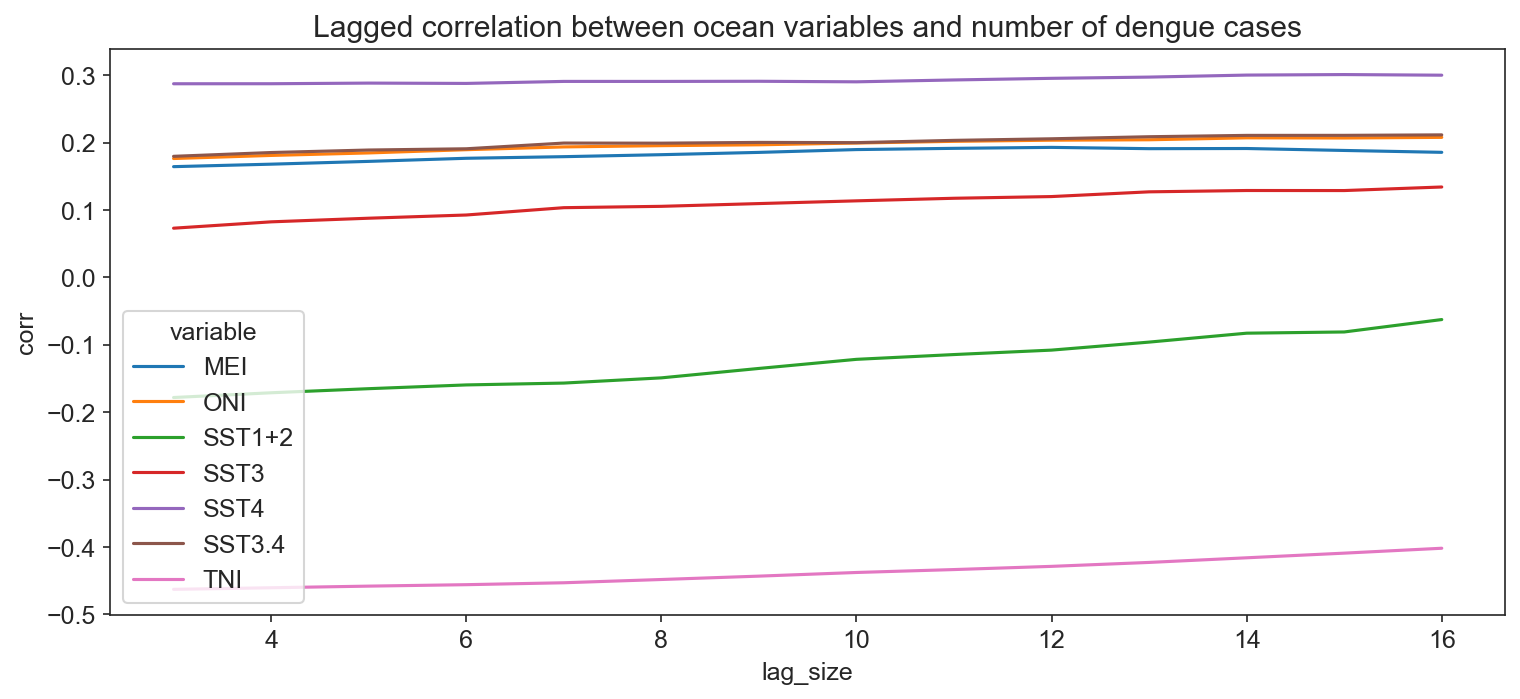

In [256]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub, hue = 'variable').set_title('Lagged correlation between ocean variables and number of dengue cases')

In [257]:
df_corr_melt_sub3 = df_corr_melt[df_corr_melt['variable'] == 'DENGUE']
# df_corr_melt_sub3

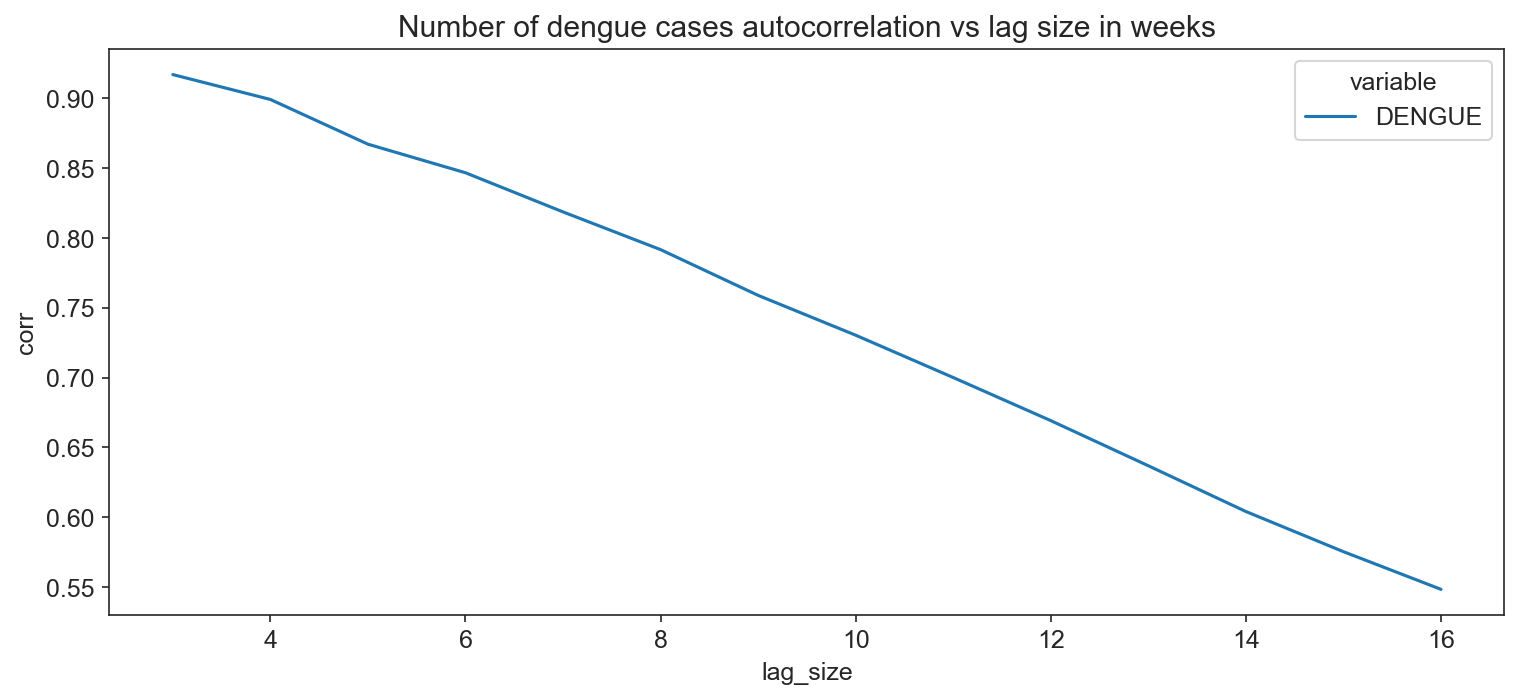

In [258]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub3, hue = 'variable').set_title('Number of dengue cases autocorrelation vs lag size in weeks')

In [259]:
df_corr_melt_sub2 = df_corr_melt[df_corr_melt['variable'].isin(('TEMPERATURE_MEAN', 'REL_HUMIDITY_MEAN', 'PRECIPITATION'))]
# df_corr_melt_sub2

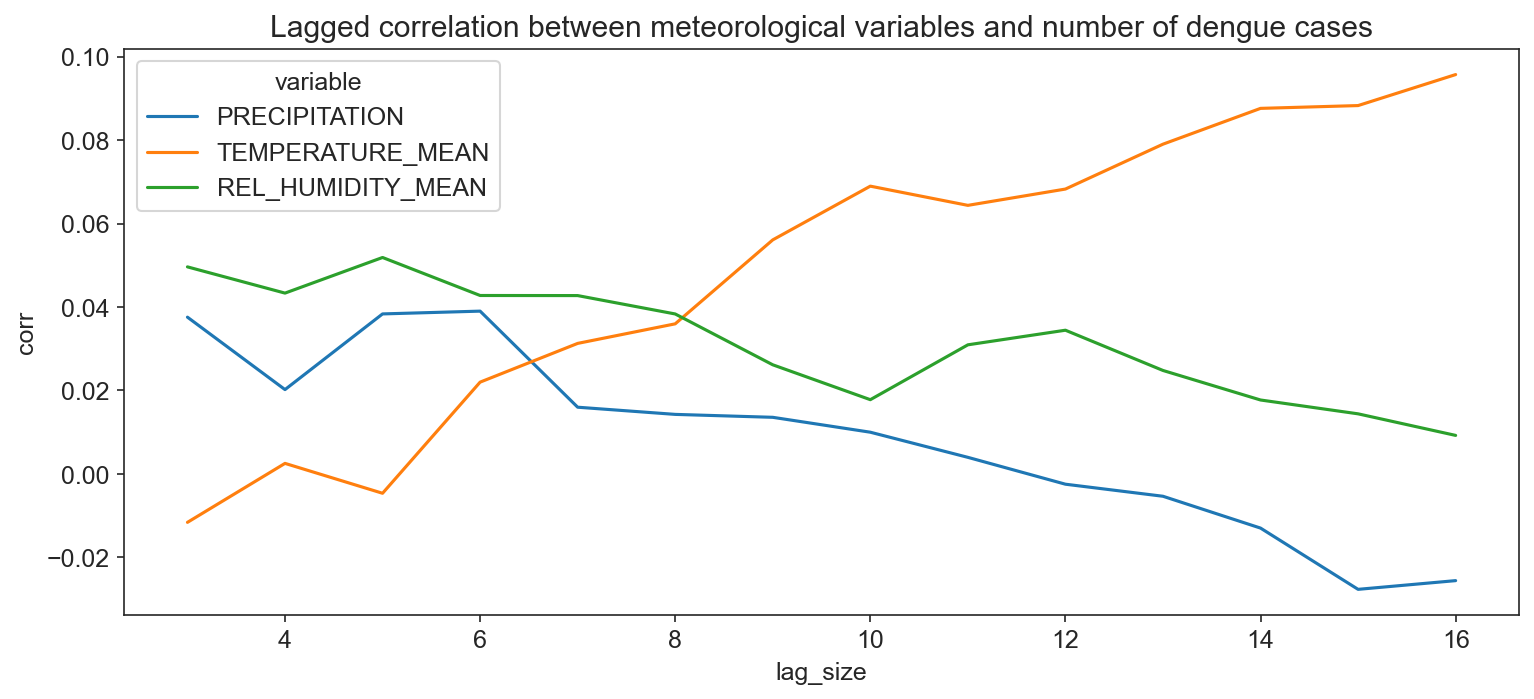

In [260]:
fig, axs = plt.subplots(figsize = (12,5), dpi=150)
ax = sns.lineplot(x='lag_size', y='corr', data=df_corr_melt_sub2, hue = 'variable').set_title('Lagged correlation between meteorological variables and number of dengue cases')

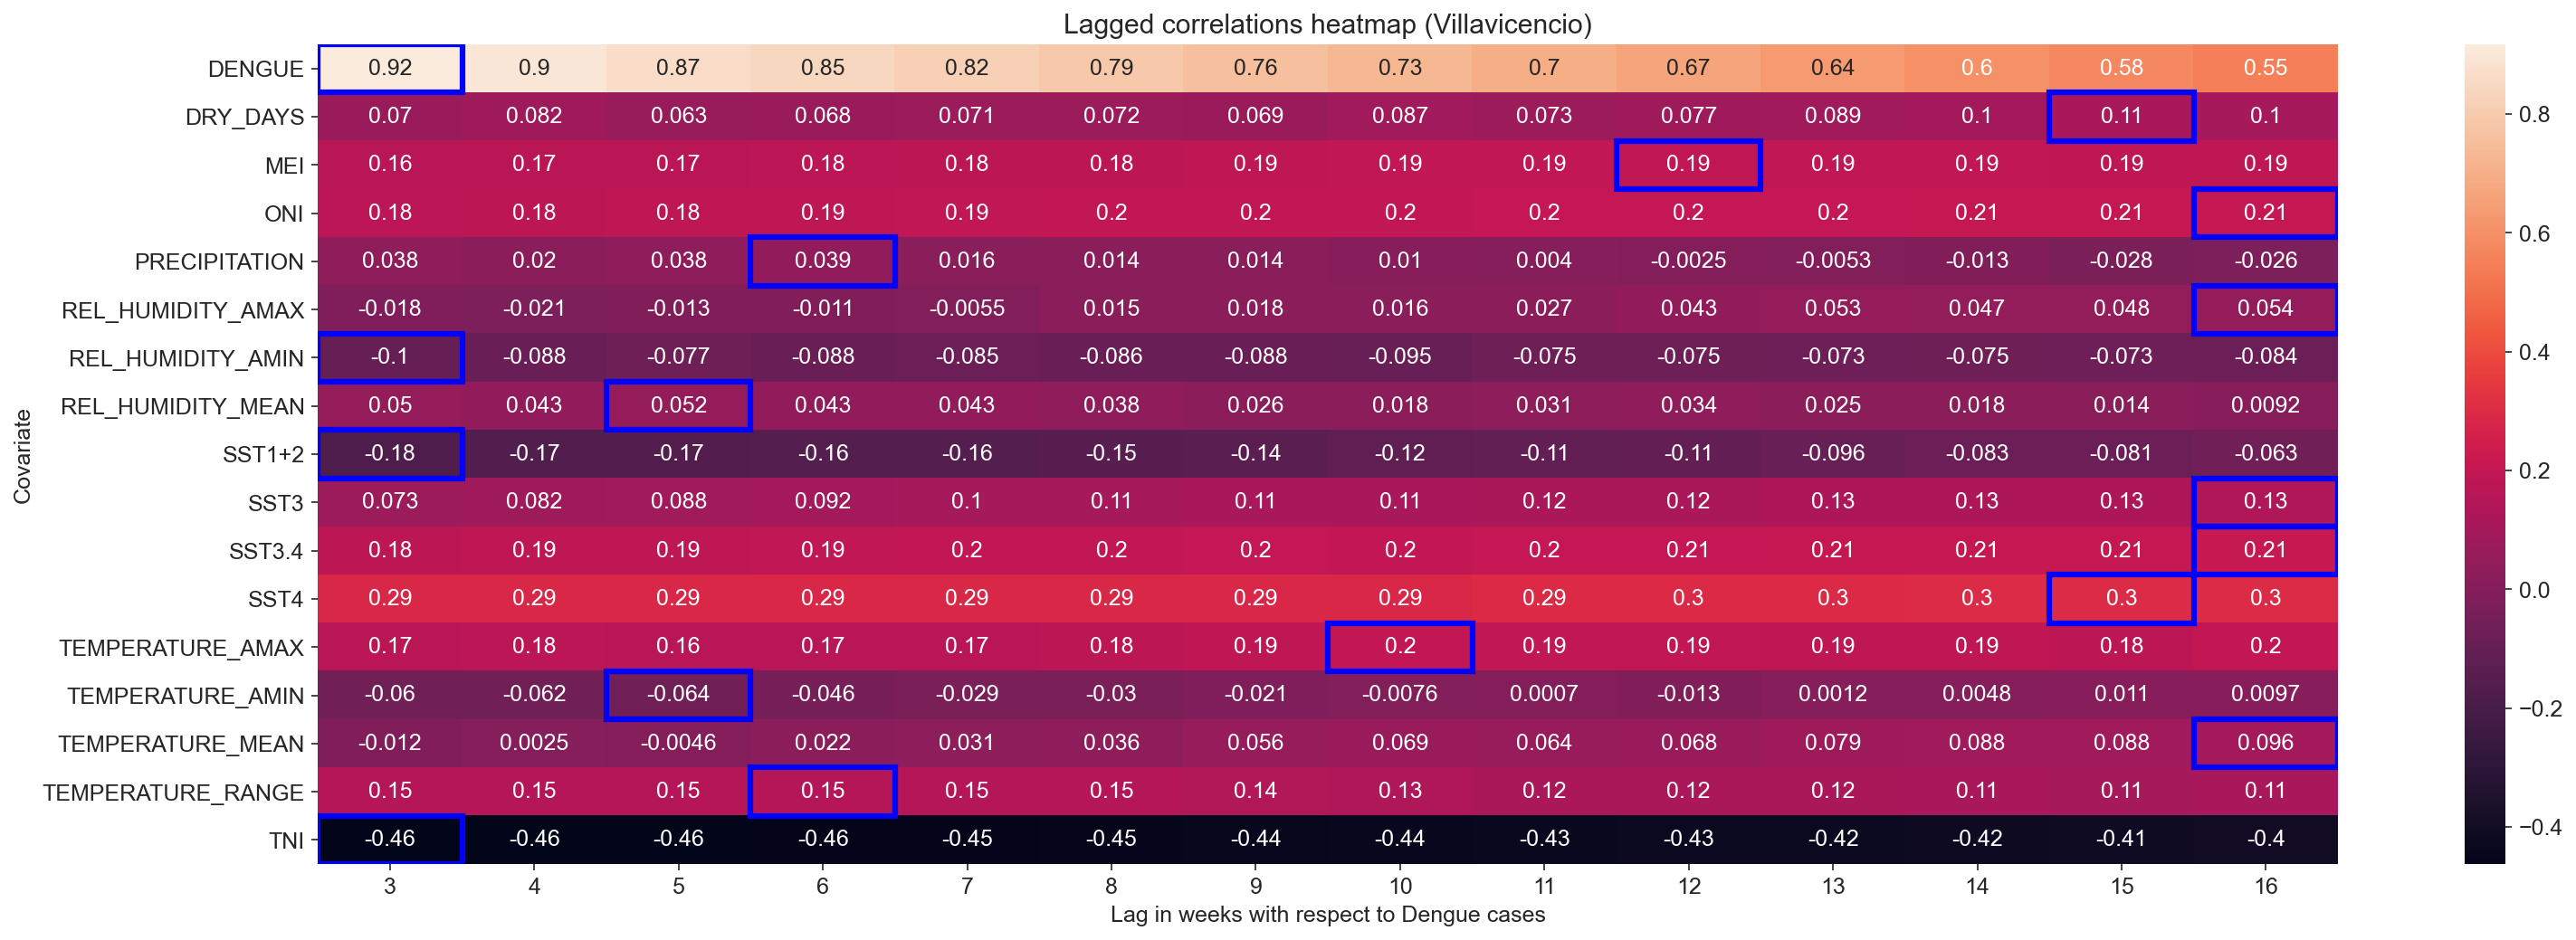

In [261]:
fig, ax = plt.subplots(1,1, figsize=(24,8), dpi = 150)
sns.heatmap(df_corr_pivot, annot = True, ax = ax)
ax.set_xlabel("Lag in weeks with respect to Dengue cases")
ax.set_title("Lagged correlations heatmap ({})".format(municipality))
ax.set_ylabel("Covariate");
for row, index in enumerate(columns):
    position = df_corr_pivot.columns.get_loc(row_max[index])
    ax.add_patch(Rectangle((position, row),1,1, fill=False, edgecolor='blue', lw=3))


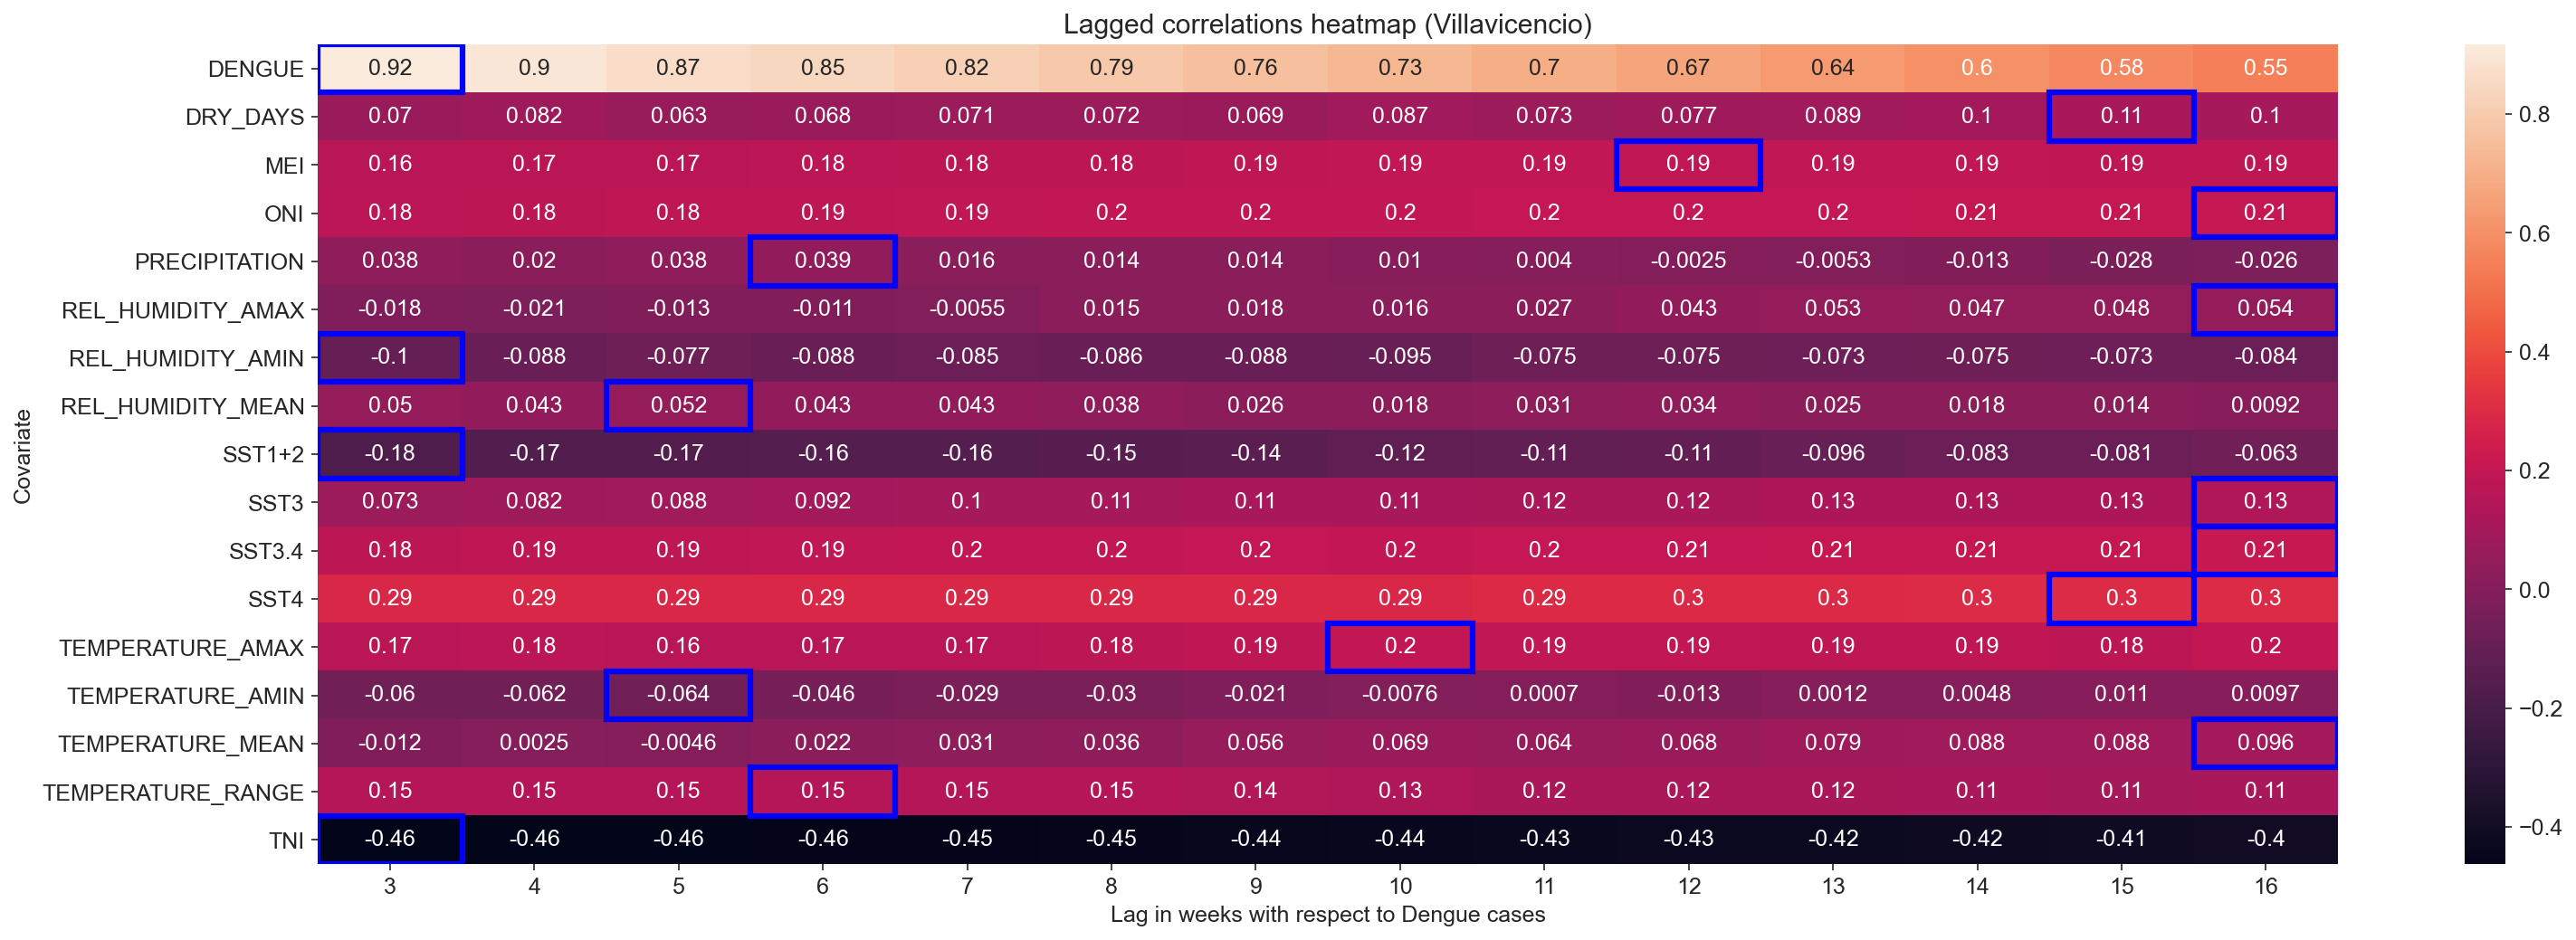

In [262]:
fig, ax = plt.subplots(1,1, figsize=(24,8), dpi = 150)
sns.heatmap(df_corr_pivot, annot = True, ax = ax)
ax.set_xlabel("Lag in weeks with respect to Dengue cases")
ax.set_title("Lagged correlations heatmap ({})".format(municipality))
ax.set_ylabel("Covariate");
for row, index in enumerate(columns):
    position = df_corr_pivot.columns.get_loc(row_max[index])
    ax.add_patch(Rectangle((position, row),1,1, fill=False, edgecolor='blue', lw=3))


The following function is done with the purpose of calculating the correlation between the meteorological variables and the lagged dengue, this variable is lagged up to 17 times and the `phases_confirmed` dataframe shows the result of this calculations.

In [263]:
def obtener_conjunto_desfasado(datos,meses_desfase):
    dat_desfase = datos.copy().reset_index(drop=True)
    for i in range(len(dat_desfase)-meses_desfase):
        dat_desfase.loc[i,"DENGUE_UNPHASED"] = dat_desfase.loc[i+meses_desfase,"DENGUE"]
    quitar_filas = list(range(len(dat_desfase)-meses_desfase,len(dat_desfase)))
    dat_desfase= dat_desfase.drop(dat_desfase.index[quitar_filas])
    return dat_desfase

In [264]:
df_for_corr_2 = df_for_corr[cols]
phases = [obtener_conjunto_desfasado(df_for_corr_2, i).corr(method='pearson').iloc[:,-1:] for i in range(17)]
phases_confirmed = pd.concat(phases, axis = 1)

In [265]:
phases_confirmed

DENGUE_UNPHASED  DENGUE_UNPHASED  DENGUE_UNPHASED  \
PRECIPITATION             0.098488         0.093123         0.089636   
DRY_DAYS                 -0.037741        -0.020360        -0.008545   
TEMPERATURE_AMAX          0.047682         0.066884         0.081203   
REL_HUMIDITY_AMAX         0.017788        -0.000246        -0.007342   
TEMPERATURE_AMIN         -0.042270        -0.030148        -0.012983   
REL_HUMIDITY_AMIN        -0.011090        -0.024745        -0.043304   
TEMPERATURE_MEAN         -0.071338        -0.045054        -0.032948   
TEMPERATURE_RANGE         0.029991         0.044512         0.035518   
REL_HUMIDITY_MEAN         0.080393         0.059641         0.053690   
MEI                       0.142803         0.146904         0.151721   
ONI                       0.144978         0.152814         0.160350   
SST1+2                    0.048654         0.072992         0.092889   
SST3                      0.186902         0.203746         0.216092   
SST4                      0.277285         0.271659         0.266967   
SST3.4                    0.232369         0.238561         0.242249   
TNI                      -0.445608        -0.442940        -0.441228   
DENGUE                    1.000000         0.958209         0.936530   
DENGUE_UNPHASED           1.000000         1.000000         1.000000   

                   DENGUE_UNPHASED  DENGUE_UNPHASED  DENGUE_UNPHASED  \
PRECIPITATION             0.081680         0.055748         0.056696   
DRY_DAYS                  0.012317         0.036861         0.046170   
TEMPERATURE_AMAX          0.102874         0.125595         0.140050   
REL_HUMIDITY_AMAX        -0.024515        -0.039951        -0.047181   
TEMPERATURE_AMIN          0.013785         0.025225         0.036638   
REL_HUMIDITY_AMIN        -0.048030        -0.057853        -0.066825   
TEMPERATURE_MEAN         -0.008775         0.019795         0.039710   
TEMPERATURE_RANGE         0.041363         0.045602         0.055339   
REL_HUMIDITY_MEAN         0.039105         0.016655         0.002160   
MEI                       0.156312         0.161411         0.167668   
ONI                       0.167704         0.174538         0.181054   
SST1+2                    0.112671         0.133226         0.148174   
SST3                      0.227385         0.237000         0.240434   
SST4                      0.260566         0.253907         0.247001   
SST3.4                    0.244037         0.243876         0.239924   
TNI                      -0.439751        -0.436298        -0.433171   
DENGUE                    0.917056         0.899226         0.867181   
DENGUE_UNPHASED           1.000000         1.000000         1.000000   

                   DENGUE_UNPHASED  DENGUE_UNPHASED  DENGUE_UNPHASED  \
PRECIPITATION             0.043524         0.009194        -0.005304   
DRY_DAYS                  0.067578         0.090591         0.109309   
TEMPERATURE_AMAX          0.156751         0.178258         0.206482   
REL_HUMIDITY_AMAX        -0.055580        -0.056869        -0.060763   
TEMPERATURE_AMIN          0.062407         0.094257         0.112339   
REL_HUMIDITY_AMIN        -0.092072        -0.105380        -0.124046   
TEMPERATURE_MEAN          0.073002         0.105122         0.138214   
TEMPERATURE_RANGE         0.066044         0.067129         0.068880   
REL_HUMIDITY_MEAN        -0.017382        -0.037798        -0.062665   
MEI                       0.173482         0.178446         0.184142   
ONI                       0.188193         0.194843         0.199948   
SST1+2                    0.159658         0.171017         0.183291   
SST3                      0.240979         0.242427         0.237815   
SST4                      0.241700         0.237776         0.231371   
SST3.4                    0.235474         0.232716         0.222796   
TNI                      -0.430944        -0.427826        -0.422876   
DENGUE                    0.846705         0.818648      